Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
creditcard_df = pd.read_csv('Marketing_data.csv')

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [8]:
creditcard_df.info()
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

creditcard_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == max(creditcard_df['CASH_ADVANCE'])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# VISUALIZE AND EXPLORE DATASET

<Axes: >

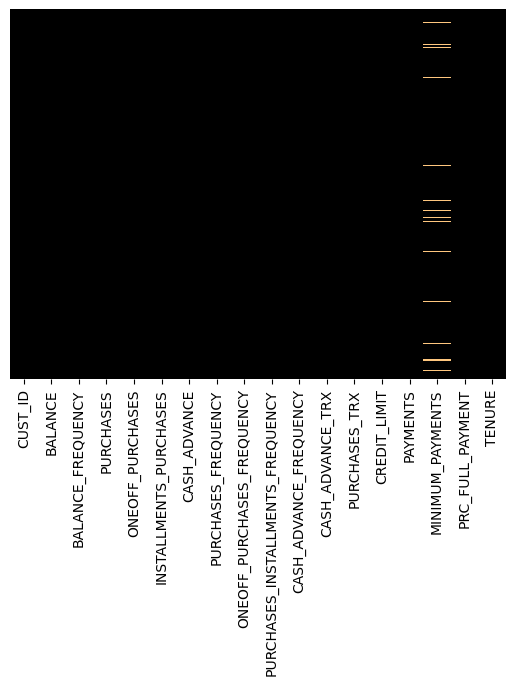

In [7]:
# Let's see if we have any missing data

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'copper')

In [8]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 

creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() ==True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [10]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() ==True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [11]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [12]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [13]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
column = creditcard_df.columns
n = len(column)
n

17

/var/folders/32/8k8cb3jn77bbc7_7_m5_xlf00000gn/T/ipykernel_73416/4108376414.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[column[i]], kde_kws = {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
/var/folders/32/8k8cb3jn77bbc7_7_m5_xlf00000gn/T/ipykernel_73416/4108376414.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com

/var/folders/32/8k8cb3jn77bbc7_7_m5_xlf00000gn/T/ipykernel_73416/4108376414.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[column[i]], kde_kws = {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})


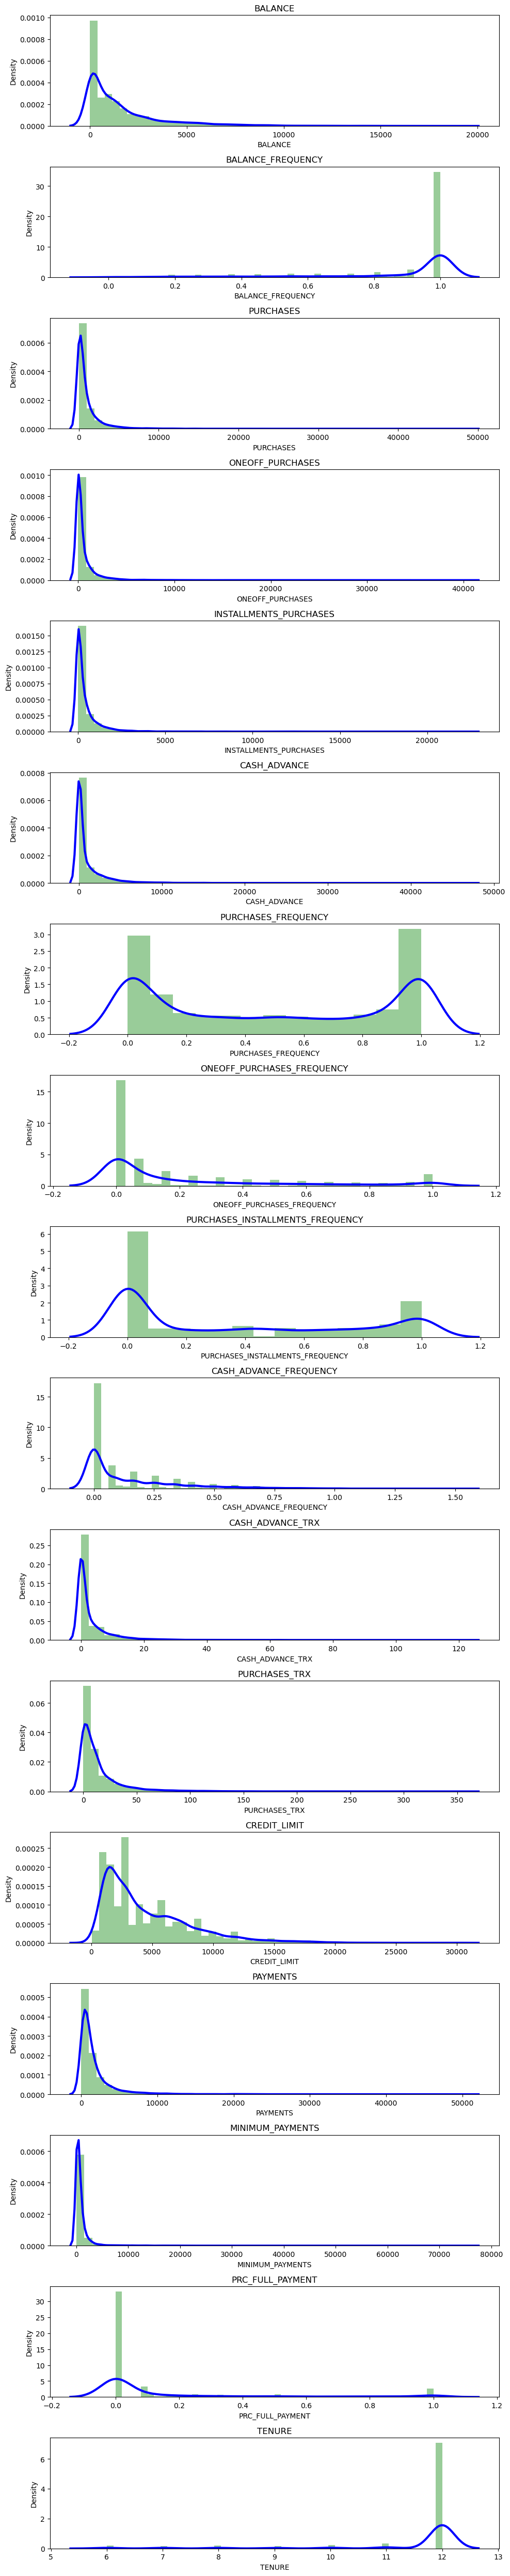

In [18]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

plt.figure(figsize = (10,50))
for i in range(n):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[column[i]], kde_kws = {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
    plt.title(column[i])
    
plt.tight_layout()


# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure


In [19]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

correlations = creditcard_df.corr()

<Axes: >

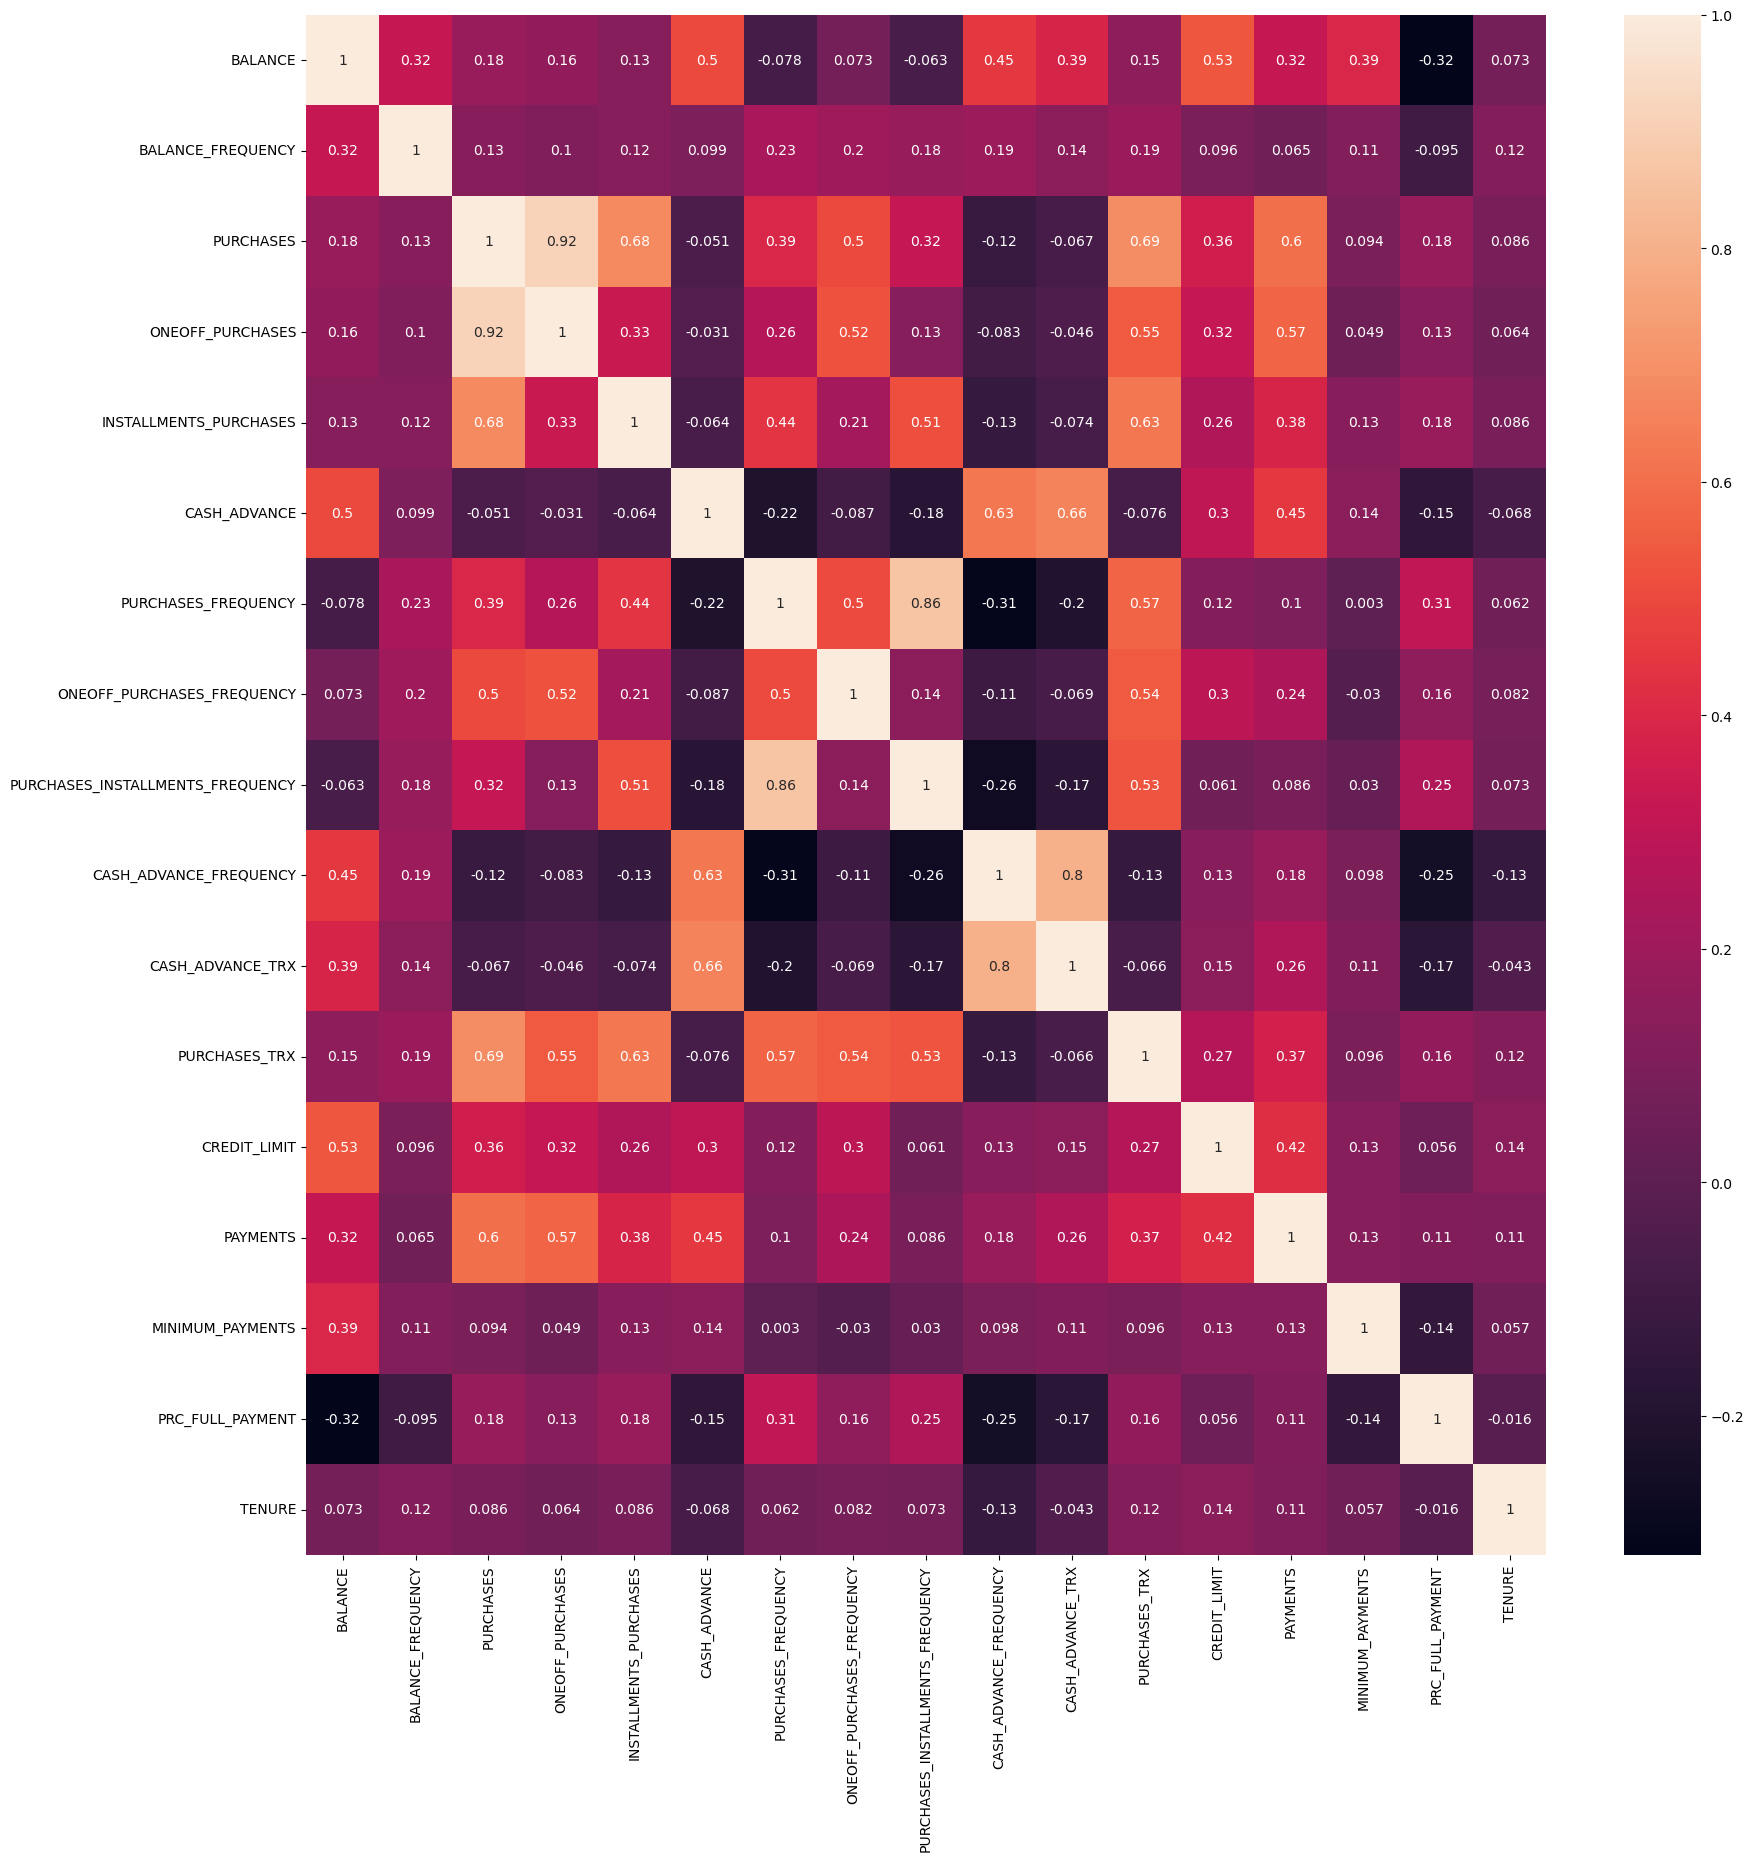

In [20]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot = True)

In [21]:
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [22]:
# Let's scale the data first (normalize)
scaler = StandardScaler()

In [23]:
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [24]:
creditcard_df_scaled.shape

(8950, 17)

In [25]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Text(0, 0.5, 'Scores WCSS')

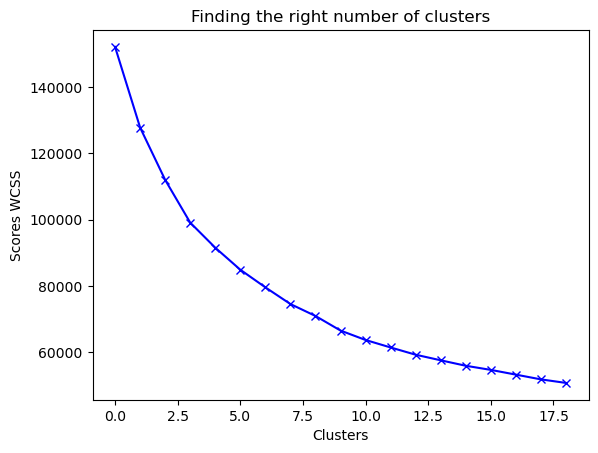

In [26]:
score1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    score1.append(kmeans.inertia_)
    
plt.plot(score1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')

In [27]:
score1
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

[152150.00000000006,
 127784.76807659268,
 111986.6980661013,
 99073.93826774819,
 91503.39081843372,
 84852.59400226278,
 79532.44469001661,
 74491.19249797672,
 70887.77051633713,
 66480.06814346788,
 63633.308357911716,
 61374.34545824999,
 59184.31306435763,
 57499.17860200699,
 55849.63354572989,
 54603.20352024815,
 53172.72786923713,
 51737.016548645974,
 50667.49471154966]

# APPLY K-MEANS METHOD

In [31]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [32]:
labels

array([6, 2, 1, ..., 4, 4, 4], dtype=int32)

In [33]:
kmeans.cluster_centers_.shape         

(7, 17)

In [34]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [column])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701928,-2.130863,-0.306836,-0.230406,-0.302100,-0.323440,-0.546396,-0.427409,-0.441065,-0.522635,-0.377066,-0.416164,-0.172380,-0.202338,-0.257708,0.296076,0.201184
1,0.134333,0.430033,0.948356,0.900843,0.587352,-0.306459,1.094244,1.869649,0.537783,-0.408424,-0.318093,1.210681,0.708890,0.395800,-0.033465,0.459704,0.307642
2,1.680042,0.395285,-0.199012,-0.146595,-0.201330,2.002738,-0.447132,-0.182778,-0.396221,1.915249,1.932749,-0.232305,1.018222,0.844153,0.557746,-0.391050,0.068538
3,-0.369631,0.332660,-0.041567,-0.231770,0.327347,-0.369147,0.973880,-0.349412,1.163342,-0.478442,-0.363470,0.167434,-0.276992,-0.224022,-0.030898,0.298467,0.252793
4,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
5,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171463,4.847281,1.104788,0.830765,0.333341
6,0.011892,0.402170,-0.345387,-0.226181,-0.401019,-0.098373,-0.817578,-0.339289,-0.758220,0.093786,-0.034341,-0.467053,-0.300468,-0.246297,-0.013989,-0.452481,0.271760


In [35]:
# In order to understand what these numbers mean, let's perform inverse transformation


# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


In [36]:
labels.shape

(8950,)

In [37]:
labels.max()

6

In [38]:
labels.min()

0

In [39]:
# concatenate the clusters labels to our original dataframe
 
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


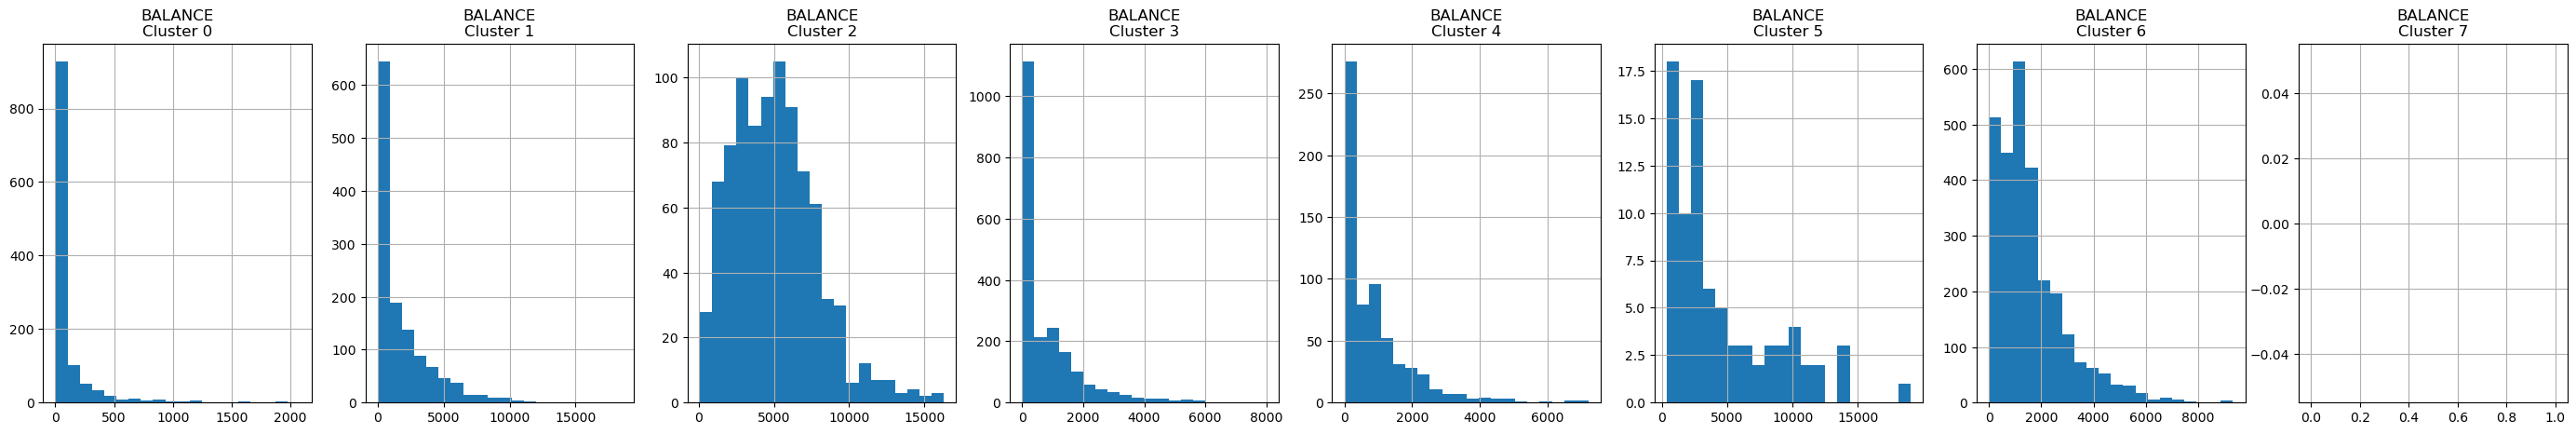

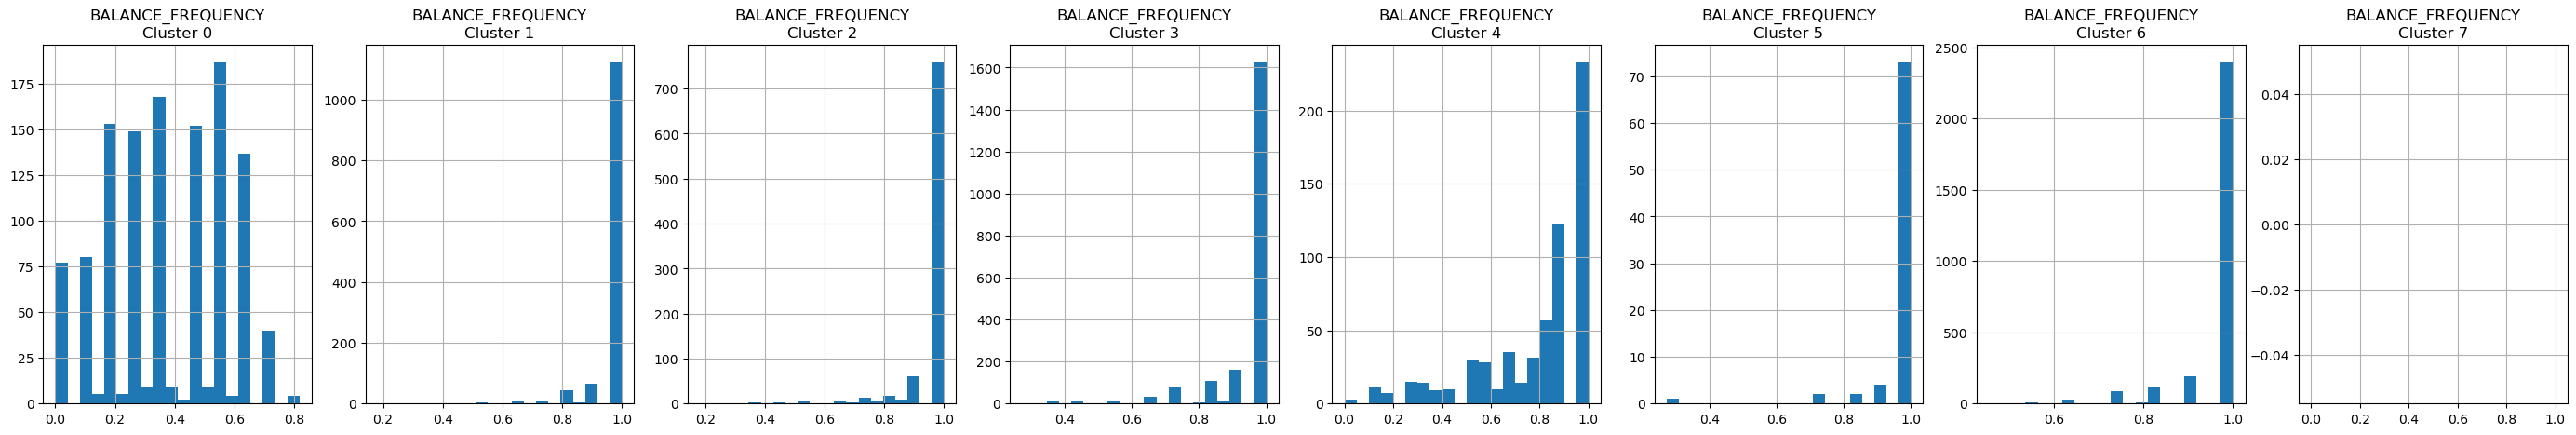

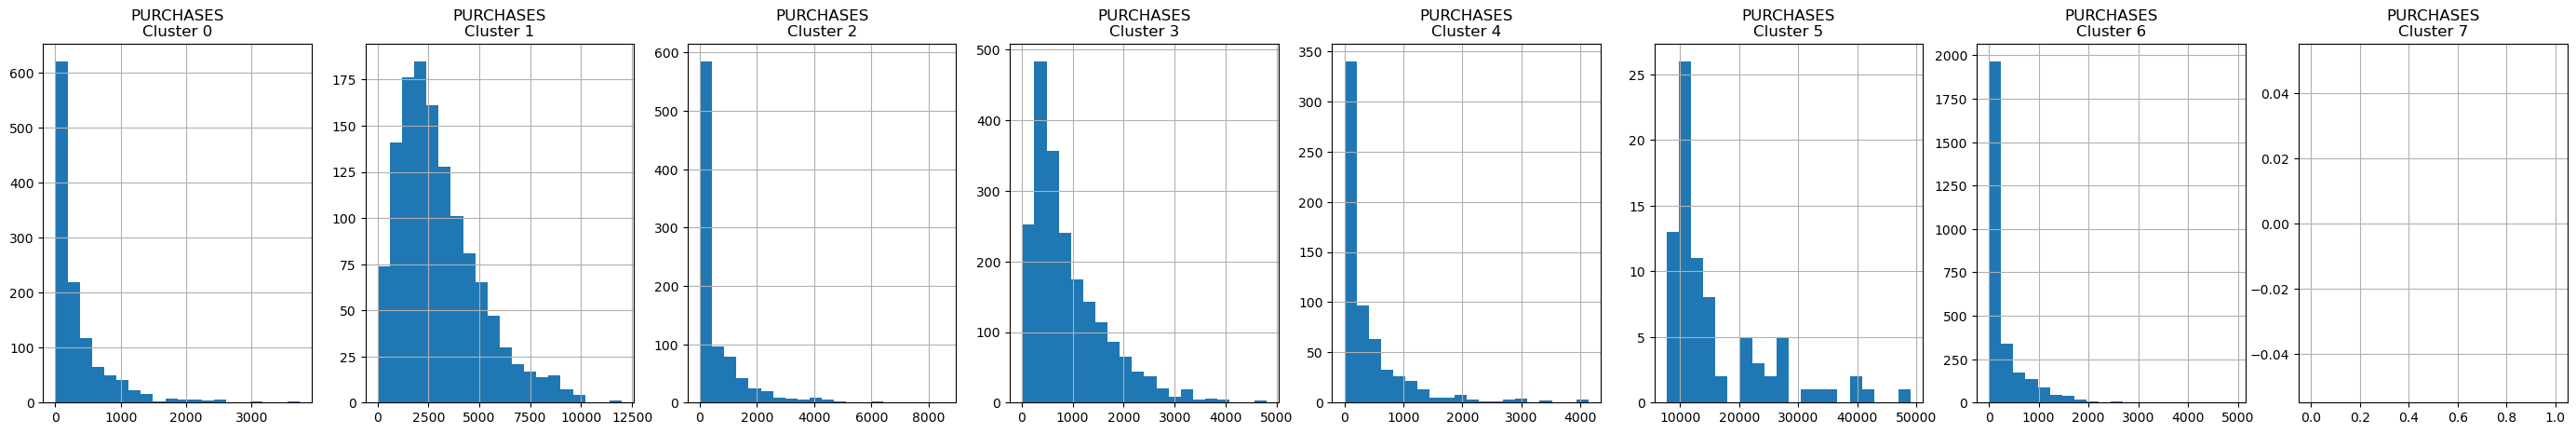

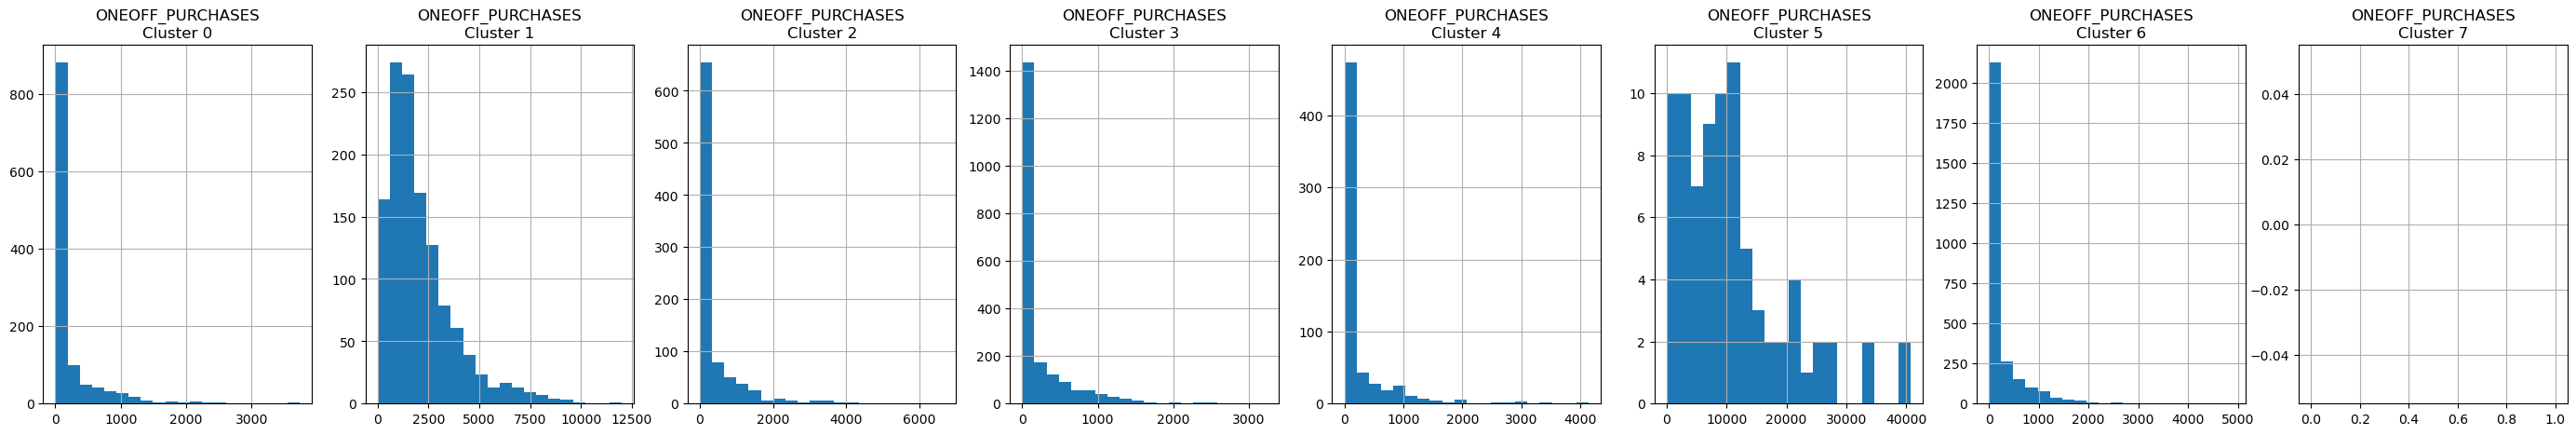

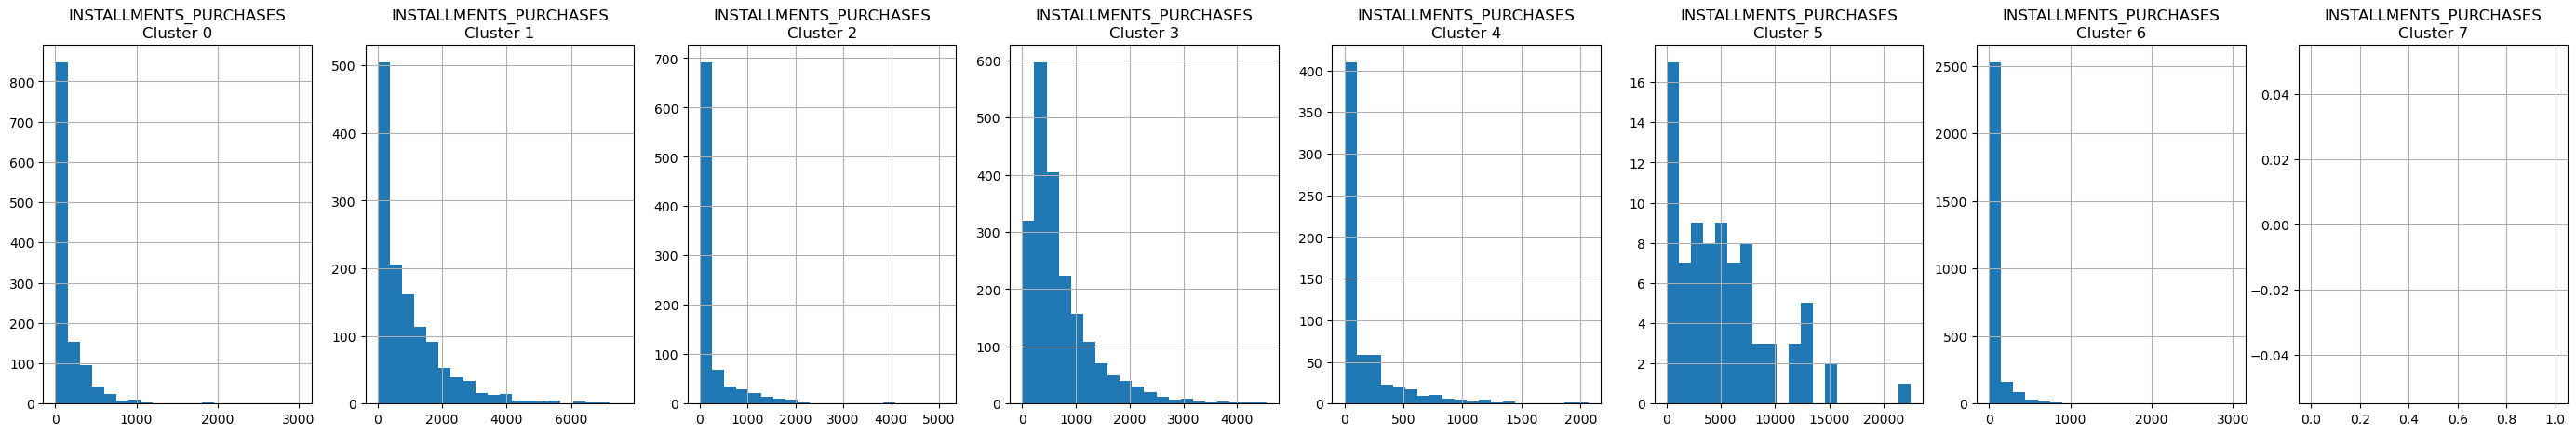

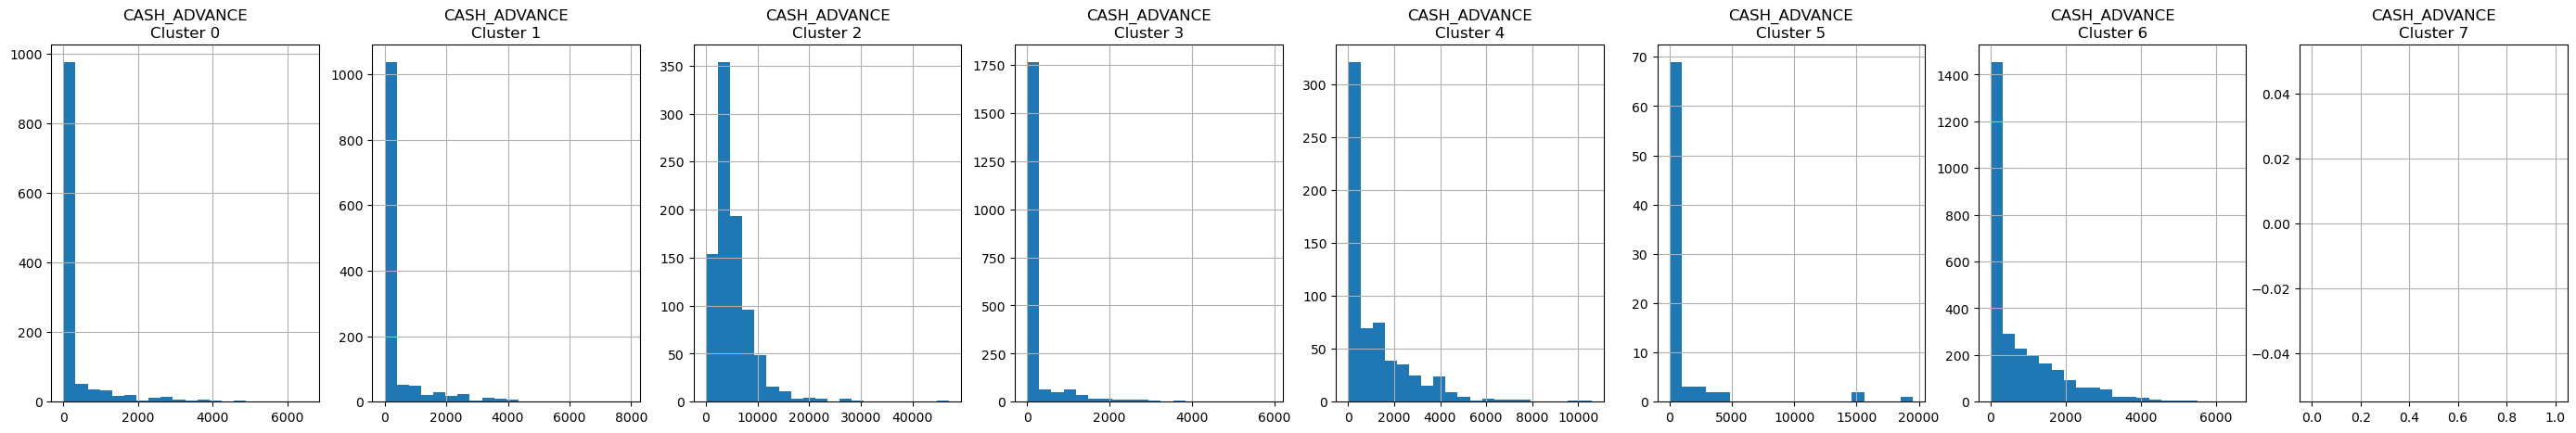

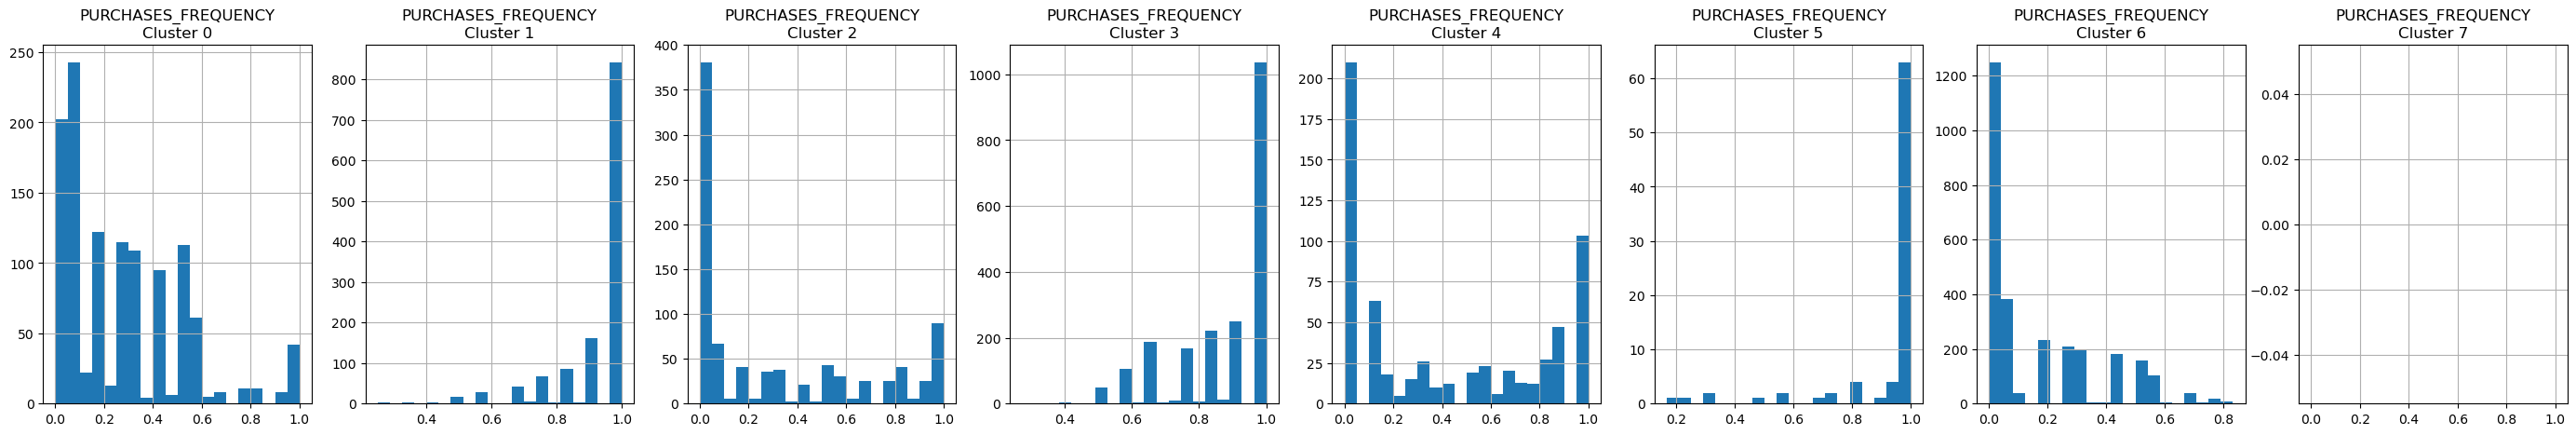

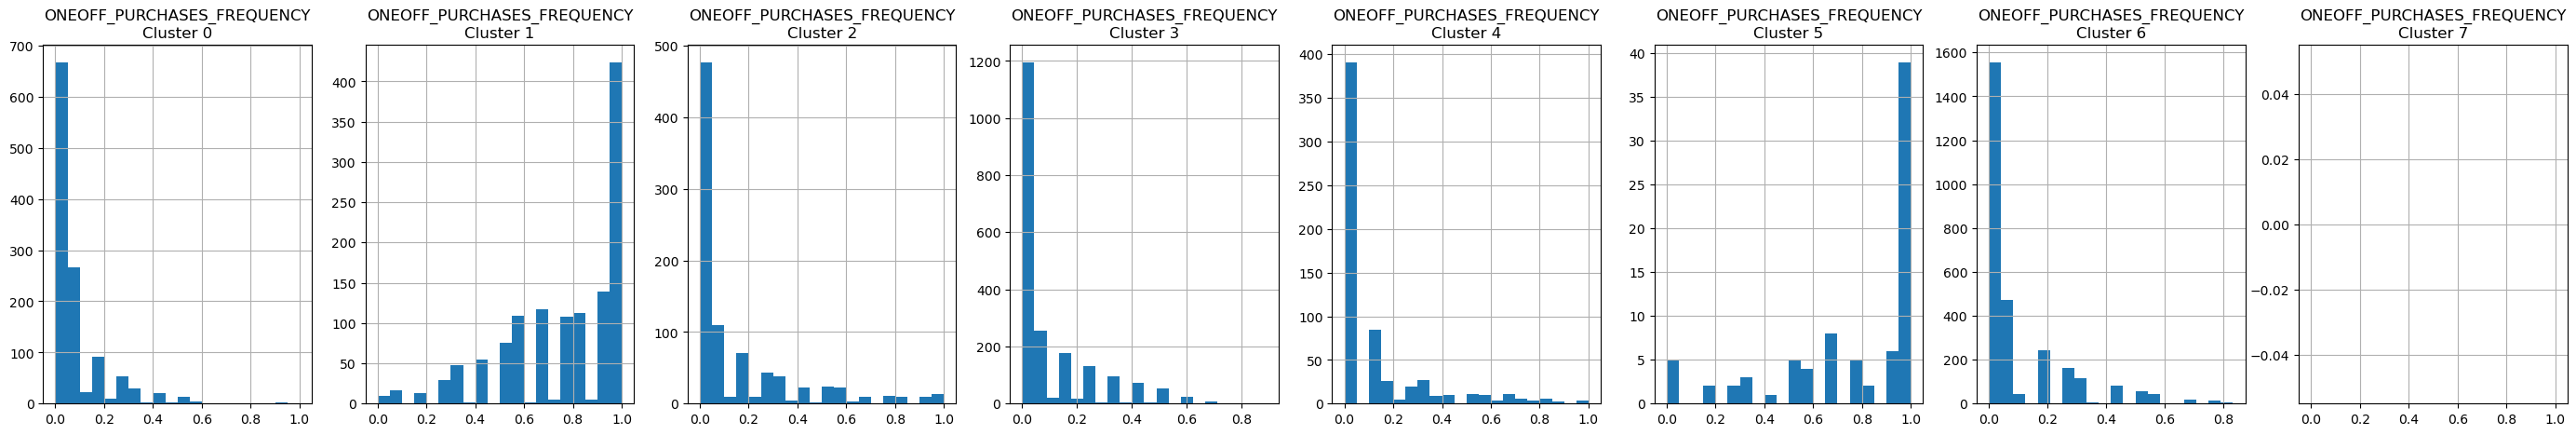

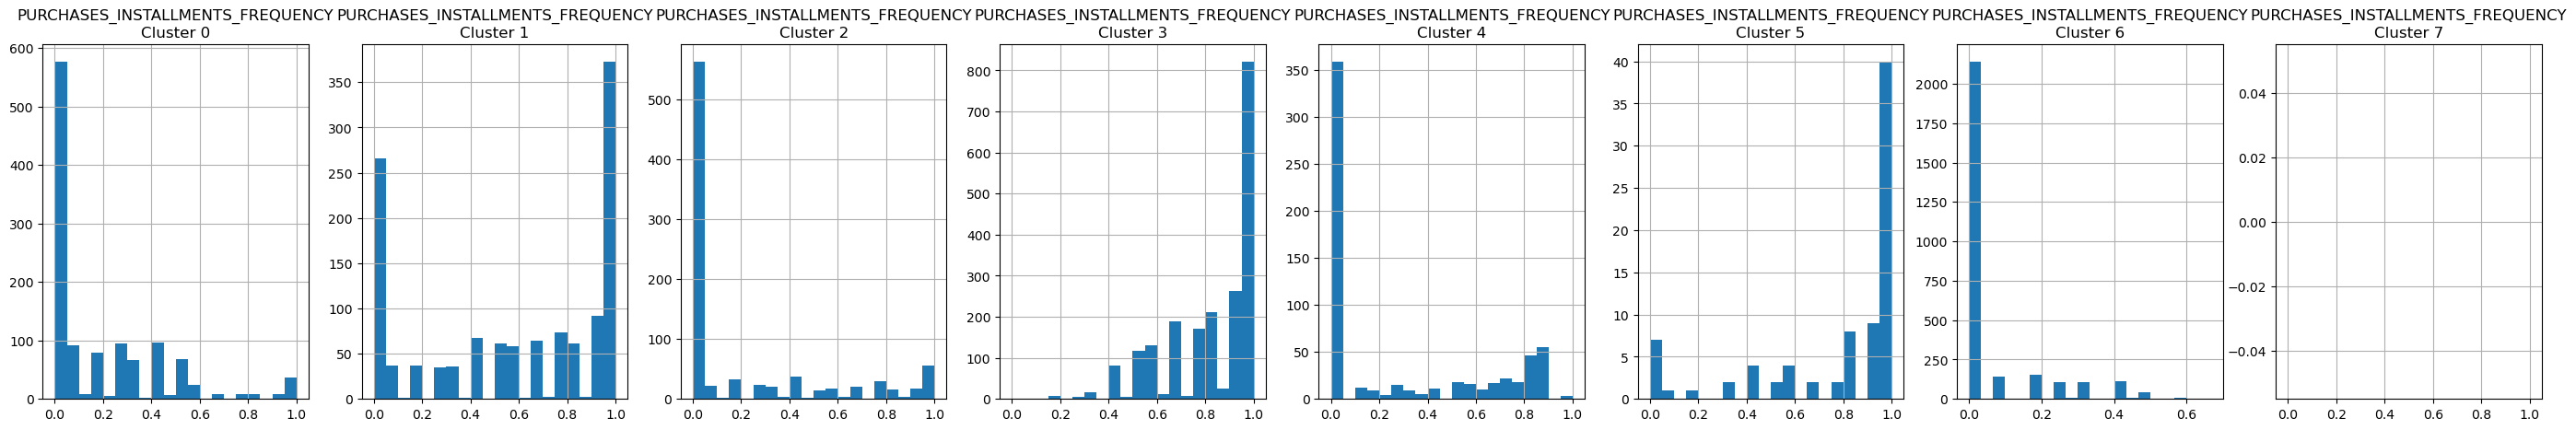

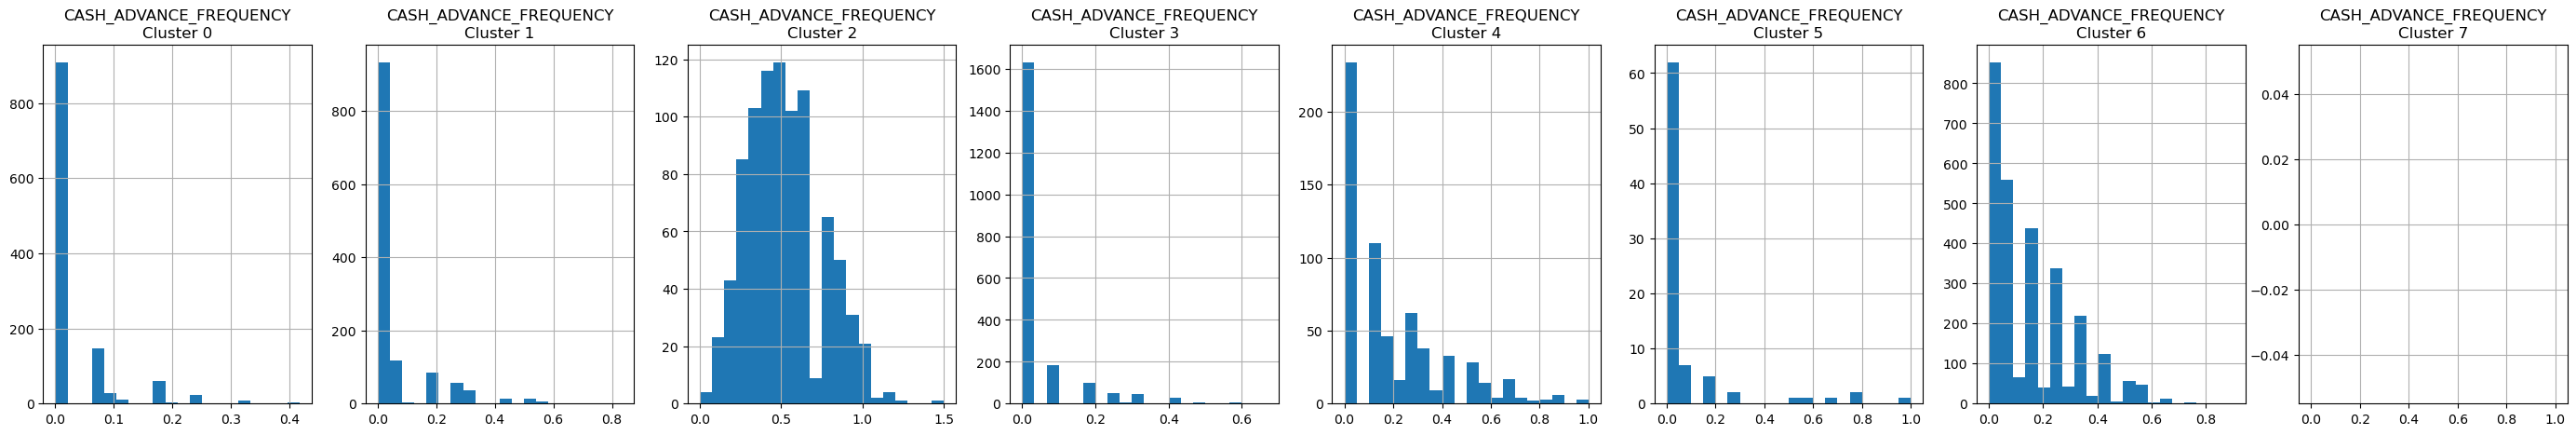

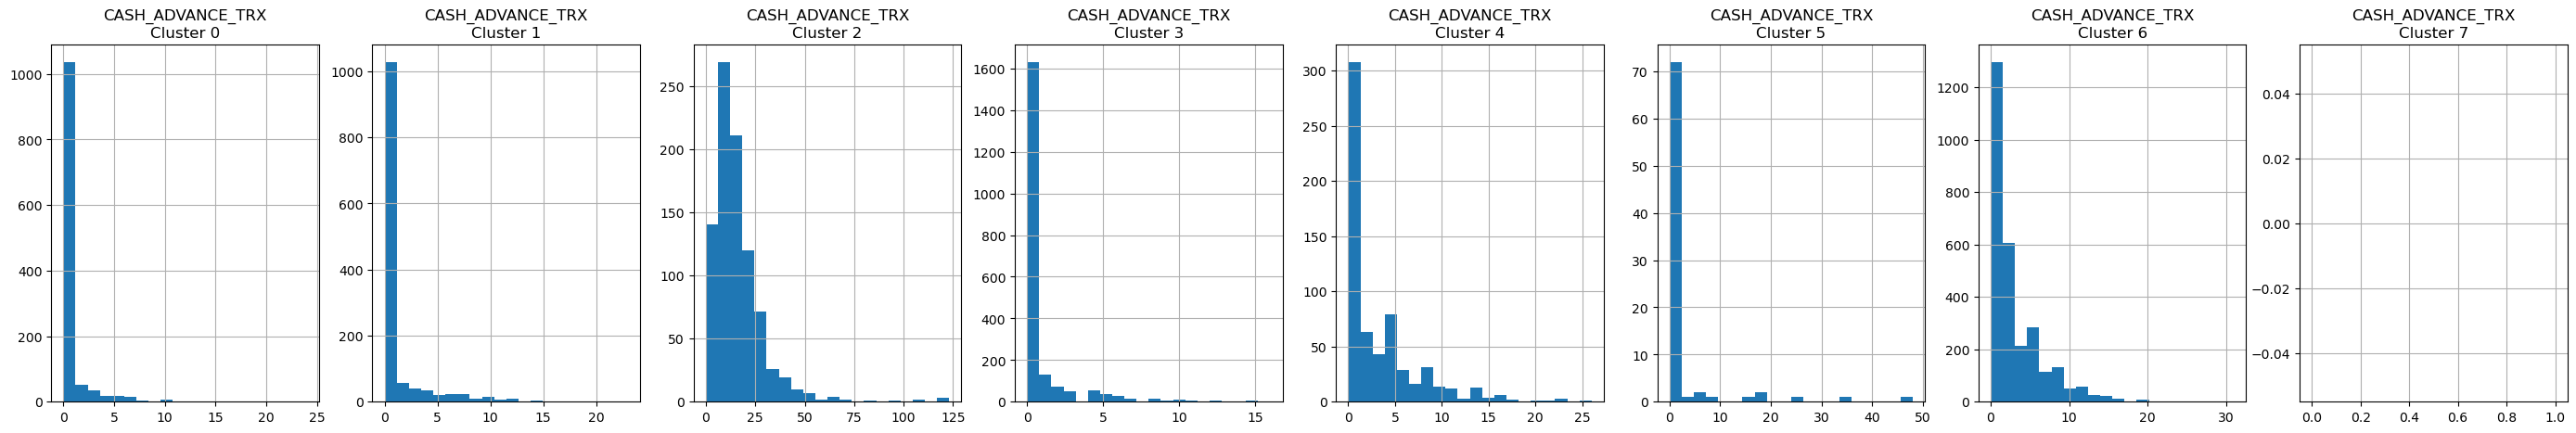

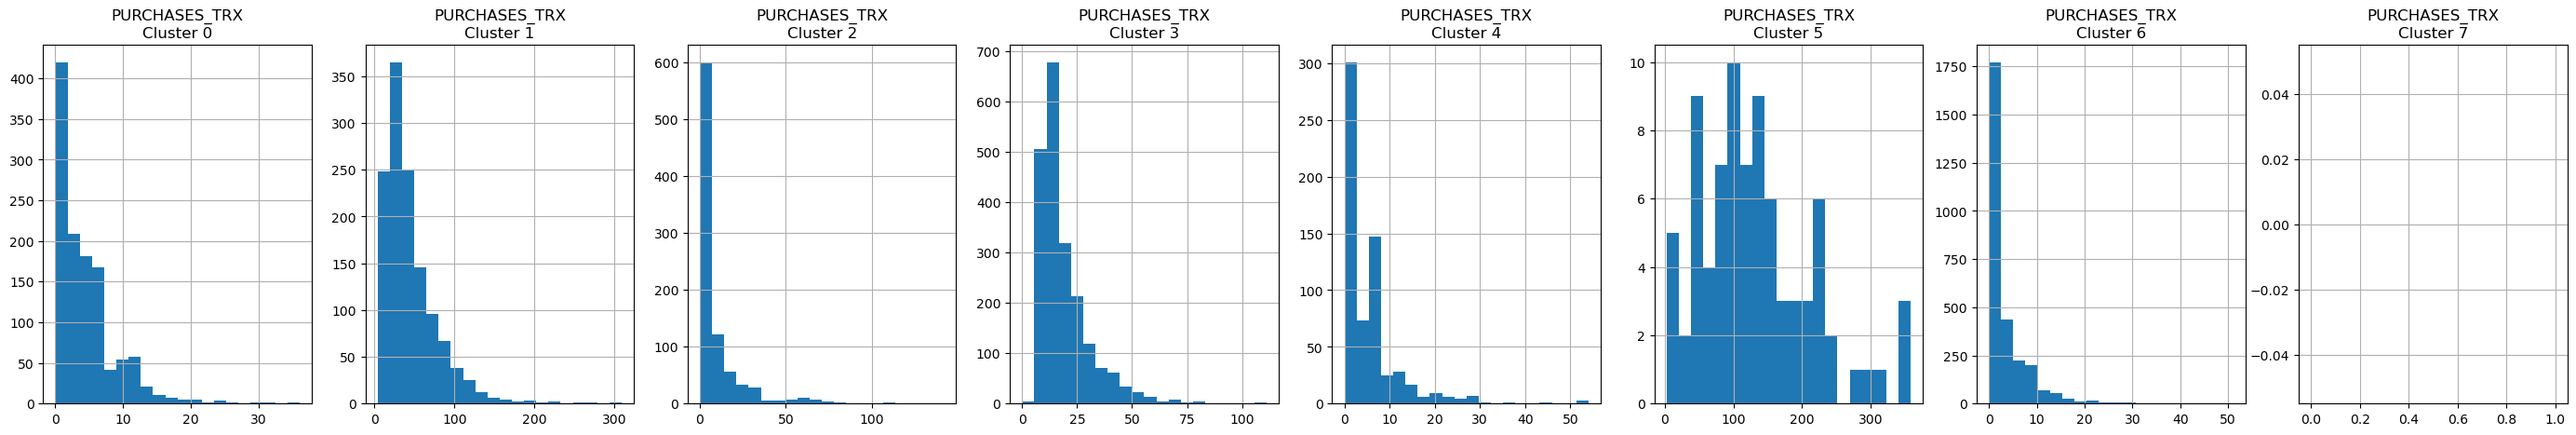

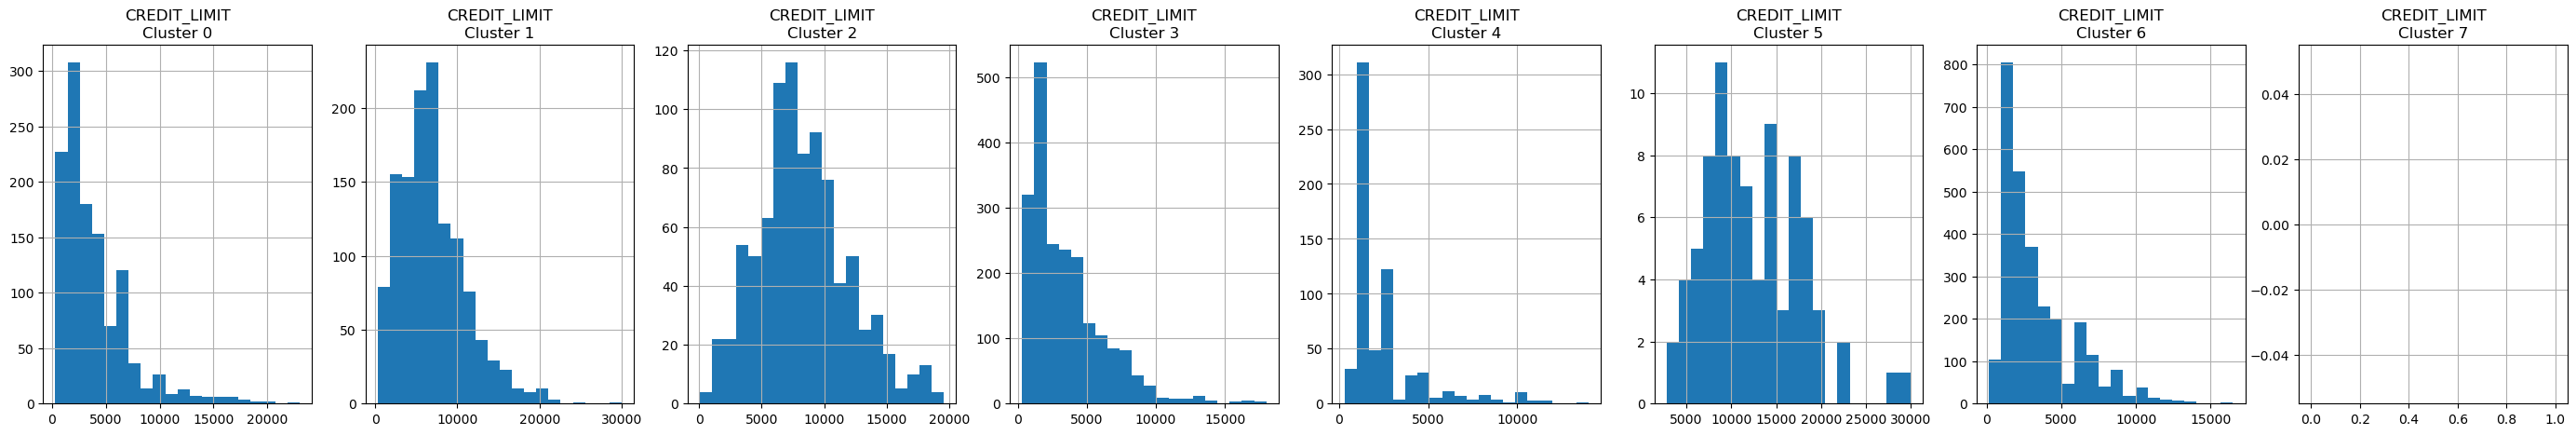

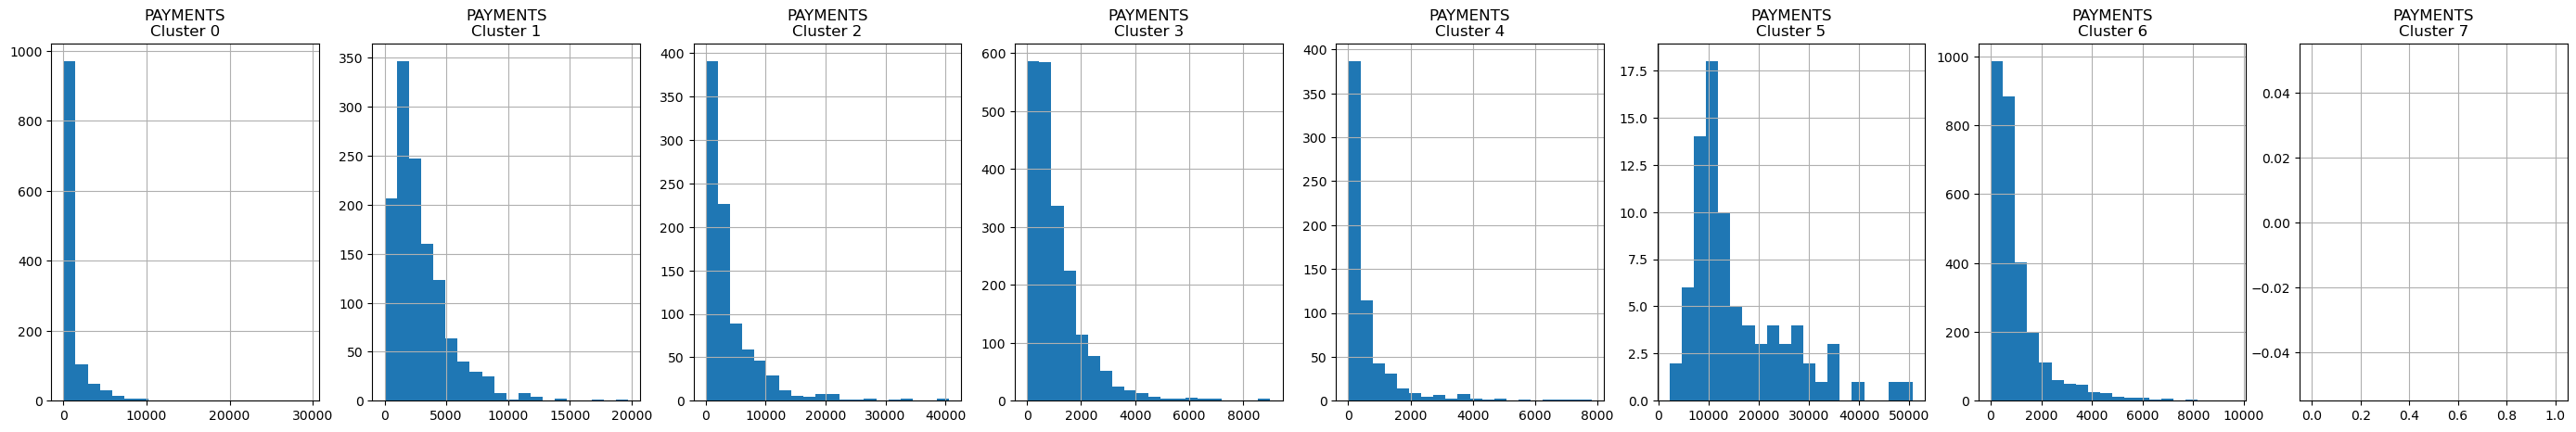

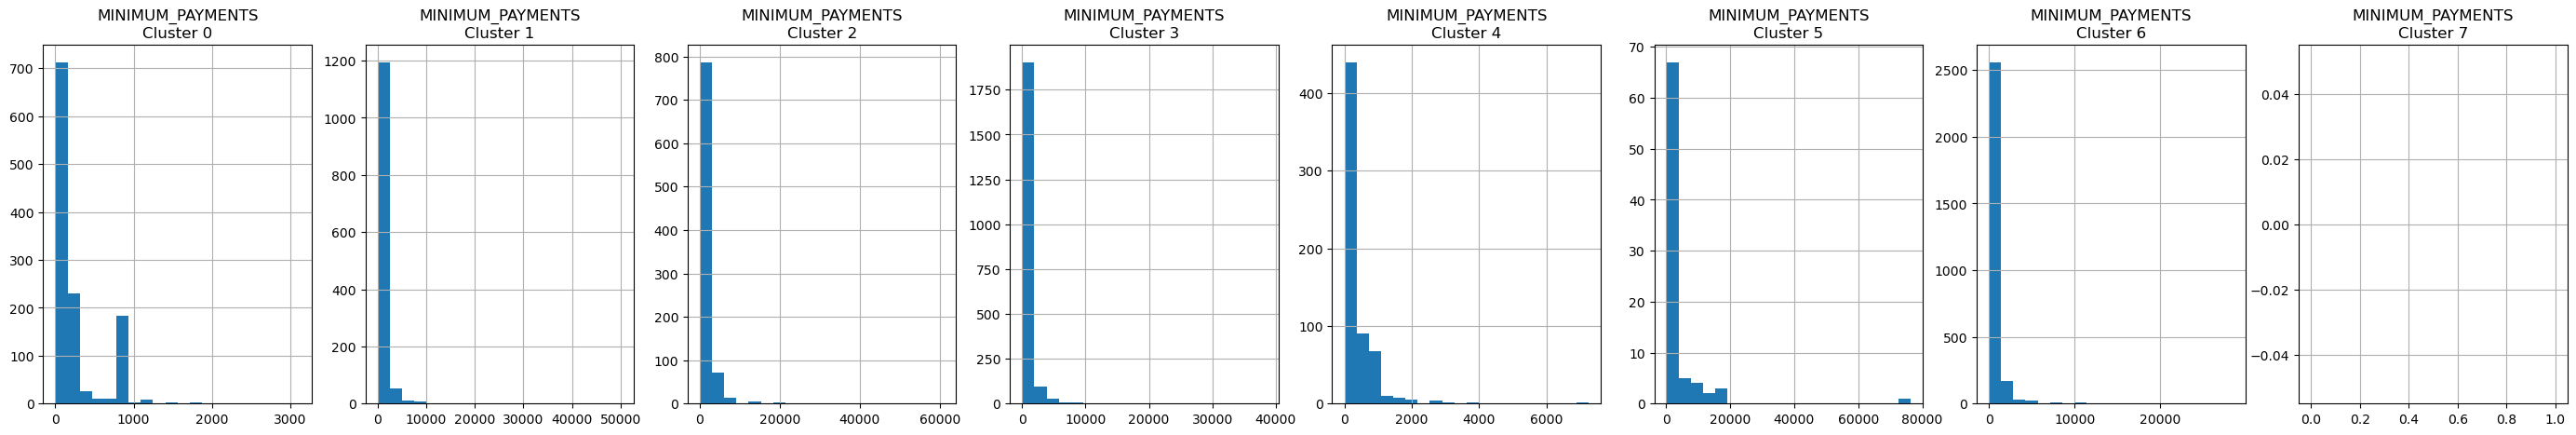

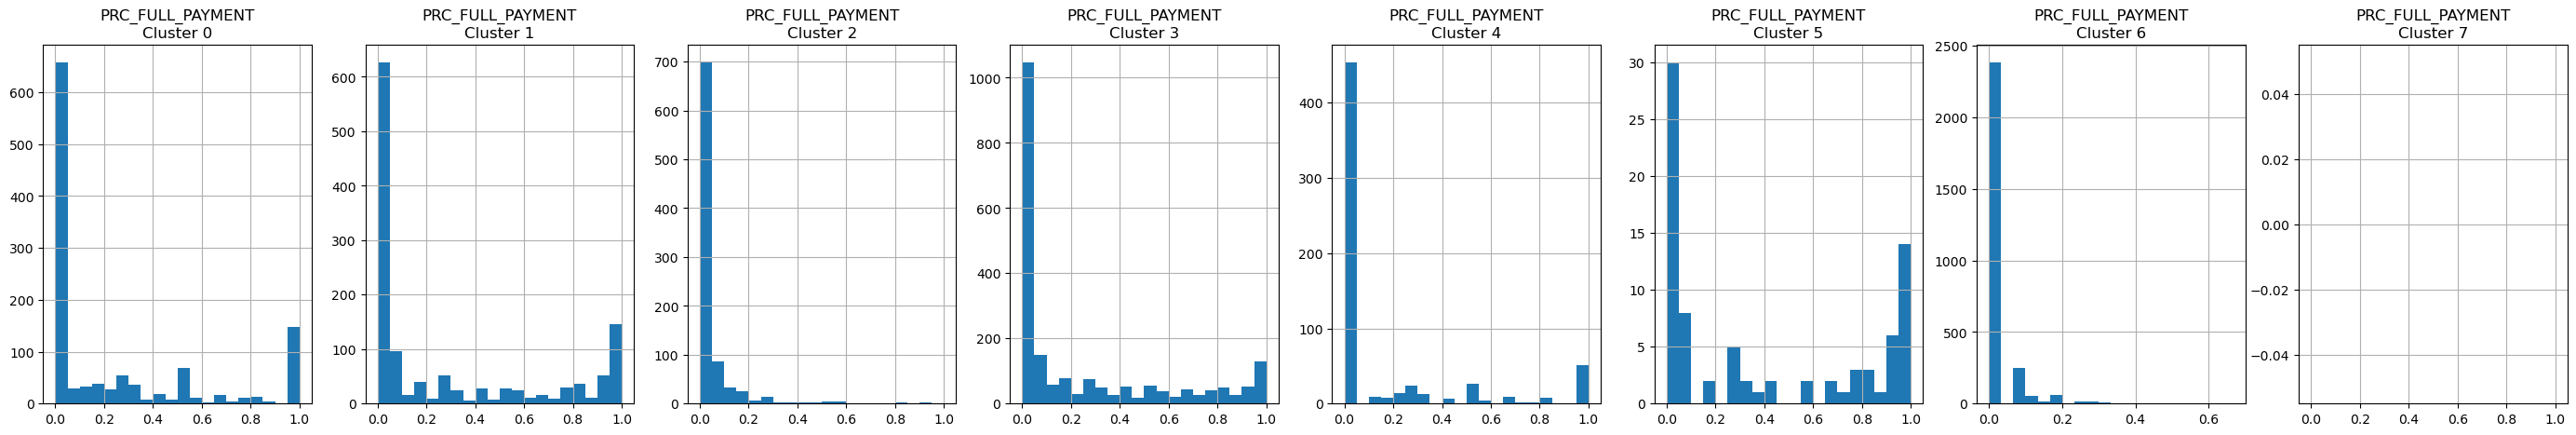

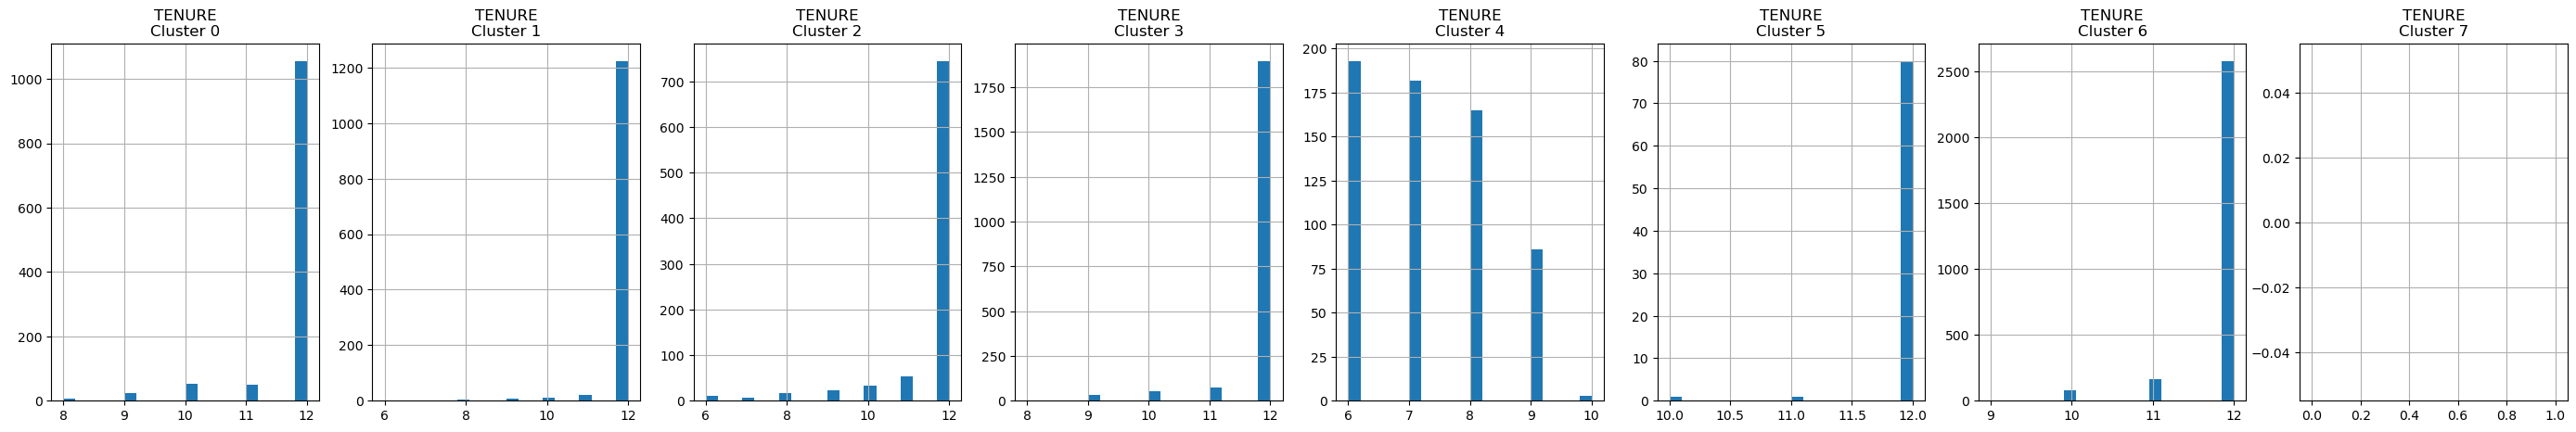

In [40]:
# Plot the histogram of various clusters
for i in column:
    plt.figure(figsize = (35,5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}\nCluster {}'.format(i,j))
        
plt.show()

# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [41]:
# Obtain the principal components 
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(creditcard_df_scaled)
principal_components

array([[-1.6822204 , -1.07645216],
       [-1.13829362,  2.50647465],
       [ 0.96968477, -0.38352642],
       ...,
       [-0.92620476, -1.81078468],
       [-2.33655326, -0.6579593 ],
       [-0.55642229, -0.40045922]])

In [42]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138294,2.506475
2,0.969685,-0.383526
3,-0.873626,0.043156
4,-1.599435,-0.688579


In [43]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.tail()

,pca1,pca2,cluster
8945,-0.359630,-2.016144,4
8946,-0.564370,-1.639124,4
8947,-0.926205,-1.810785,4
8948,-2.336553,-0.657959,4
8949,-0.556422,-0.400459,4


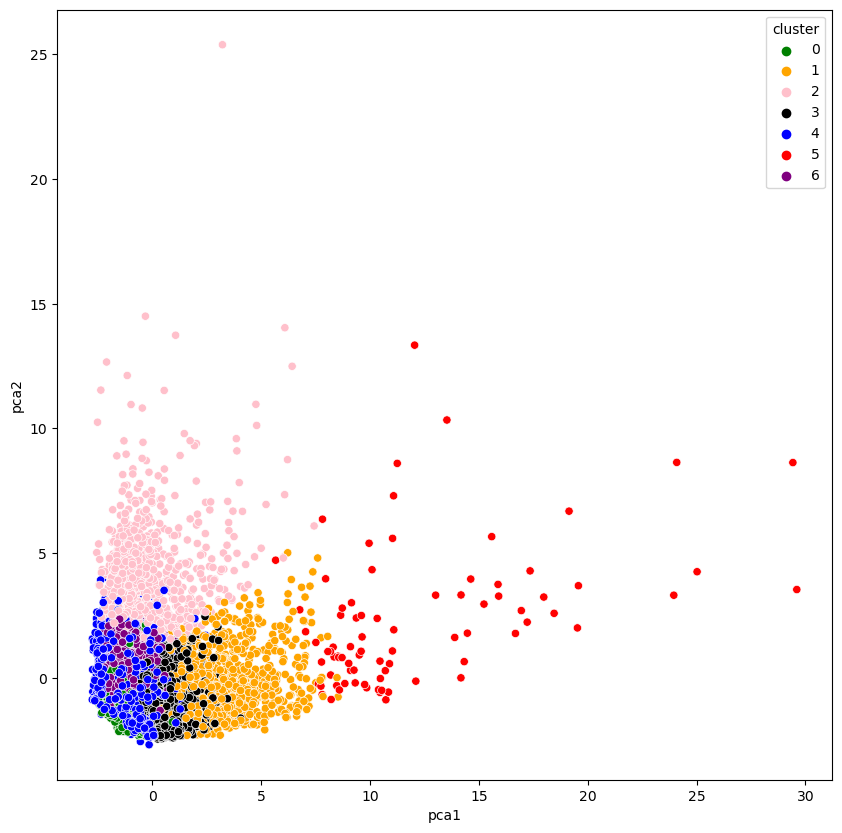

In [46]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', 
                      data = pca_df, palette =['green', 'orange', 'pink', 'black', 'blue', 'red', 'purple'])



#  APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [47]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD


In [48]:
input_df = Input(shape = (17,))
x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# Autoencoder
autoencoder = Model(input_df, decoded)

#Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

2023-03-11 21:06:19.685800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
creditcard_df_scaled.shape

(8950, 17)

In [50]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 3s 25ms/step - loss: 0.5133
Epoch 2/25
70/70 [==============================] - 3s 45ms/step - loss: 0.2756
Epoch 3/25
70/70 [==============================] - 3s 49ms/step - loss: 0.2087
Epoch 4/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1781
Epoch 5/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1522
Epoch 6/25
70/70 [==============================] - 3s 49ms/step - loss: 0.1329
Epoch 7/25
70/70 [==============================] - 3s 49ms/step - loss: 0.1223
Epoch 8/25
70/70 [==============================] - 3s 48ms/step - loss: 0.1117
Epoch 9/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1081
Epoch 10/25
70/70 [==============================] - 3s 49ms/step - loss: 0.0989
Epoch 11/25
70/70 [==============================] - 4s 54ms/step - loss: 0.0976
Epoch 12/25
70/70 [==============================] - 3s 50ms/step - loss: 0.0920
Epoch 13/25
70/70 [==================

In [51]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [52]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 2ms/step


# Applying KMeans to new predicted features

In [53]:
columns_pred = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [54]:
pred_df = pd.DataFrame(pred, columns = columns_pred)
pred_df.head()

,1,2,3,4,5,6,7,8,9,10
0,0.0,0.413629,0.0,0.435393,0.038494,0.621653,0.0,0.238469,0.0,0.167341
1,0.0,2.048293,0.0,1.432650,1.686682,0.088842,0.0,0.140963,0.0,0.614717
2,0.0,0.551737,0.0,1.430826,0.786594,0.036242,0.0,2.375398,0.0,1.482285
3,0.0,0.287391,0.0,0.090676,0.661145,0.316901,0.0,0.212531,0.0,0.506114
4,0.0,0.228773,0.0,0.506183,0.029744,0.275598,0.0,0.143598,0.0,0.323505


Text(0, 0.5, 'Scores WCSS')

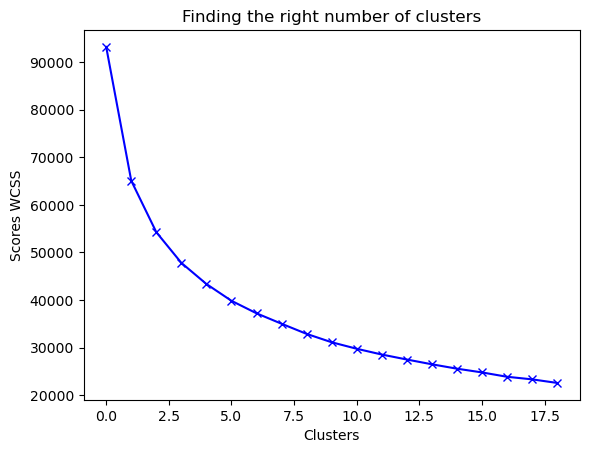

In [55]:
score2 = []

for i in range_values:
    kmeans_pred = KMeans(n_clusters = i)
    kmeans_pred.fit(pred)
    score2.append(kmeans_pred.inertia_)
    
plt.plot(score2, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')

In [56]:
score2


[93167.984375,
 65071.4140625,
 54263.29296875,
 47817.56640625,
 43380.046875,
 39852.140625,
 37227.0859375,
 35033.9453125,
 32902.87890625,
 31143.626953125,
 29779.1328125,
 28566.296875,
 27520.43359375,
 26517.568359375,
 25596.439453125,
 24810.900390625,
 23896.4921875,
 23353.466796875,
 22603.984375]

In [57]:
kmeans_pred = KMeans(4)
kmeans_pred.fit(pred)
labels = kmeans_pred.labels_
labels

array([3, 3, 0, ..., 0, 3, 0], dtype=int32)

In [58]:
kmeans_pred.cluster_centers_.shape

(4, 10)

In [59]:
pred_cluster_centers = pd.DataFrame(data = kmeans_pred.cluster_centers_, columns = columns_pred)
pred_cluster_centers

,1,2,3,4,5,6,7,8,9,10
0,0.0,1.135282,0.0,1.724867,0.888178,2.211117,0.0,2.265560,0.0,1.378483
1,0.0,2.972161,0.0,3.211547,2.310482,1.989125,0.0,2.108414,0.0,2.861069
2,0.0,4.874111,0.0,5.894452,8.689112,6.072001,0.0,5.846215,0.0,5.671463
3,0.0,0.955046,0.0,1.021061,0.400434,0.643549,0.0,0.466946,0.0,0.625900


In [60]:
labels.shape

(8950,)

In [61]:
labels.max()

3

In [62]:
pred_cluster = pd.concat([pred_df, pd.DataFrame({'cluster':labels})], axis = 1)
pred_cluster

,1,2,3,4,5,6,7,8,9,10,cluster
0,0.0,0.413629,0.0,0.435393,0.038494,0.621653,0.0,0.238469,0.0,0.167341,3
1,0.0,2.048293,0.0,1.432650,1.686682,0.088842,0.0,0.140963,0.0,0.614717,3
2,0.0,0.551737,0.0,1.430826,0.786594,0.036242,0.0,2.375398,0.0,1.482285,0
3,0.0,0.287391,0.0,0.090676,0.661145,0.316901,0.0,0.212531,0.0,0.506114,3
4,0.0,0.228773,0.0,0.506183,0.029744,0.275598,0.0,0.143598,0.0,0.323505,3
...,...,...,...,...,...,...,...,...,...,...,...
8945,0.0,3.823153,0.0,1.835000,0.124623,3.706154,0.0,2.846317,0.0,3.673354,1
8946,0.0,2.938970,0.0,1.846263,0.105159,3.166142,0.0,1.674463,0.0,3.694594,1
8947,0.0,3.020492,0.0,1.519626,0.079905,3.357259,0.0,1.490906,0.0,3.440525,0
8948,0.0,2.992288,0.0,0.303543,0.071832,1.373894,0.0,0.465335,0.0,1.891080,3


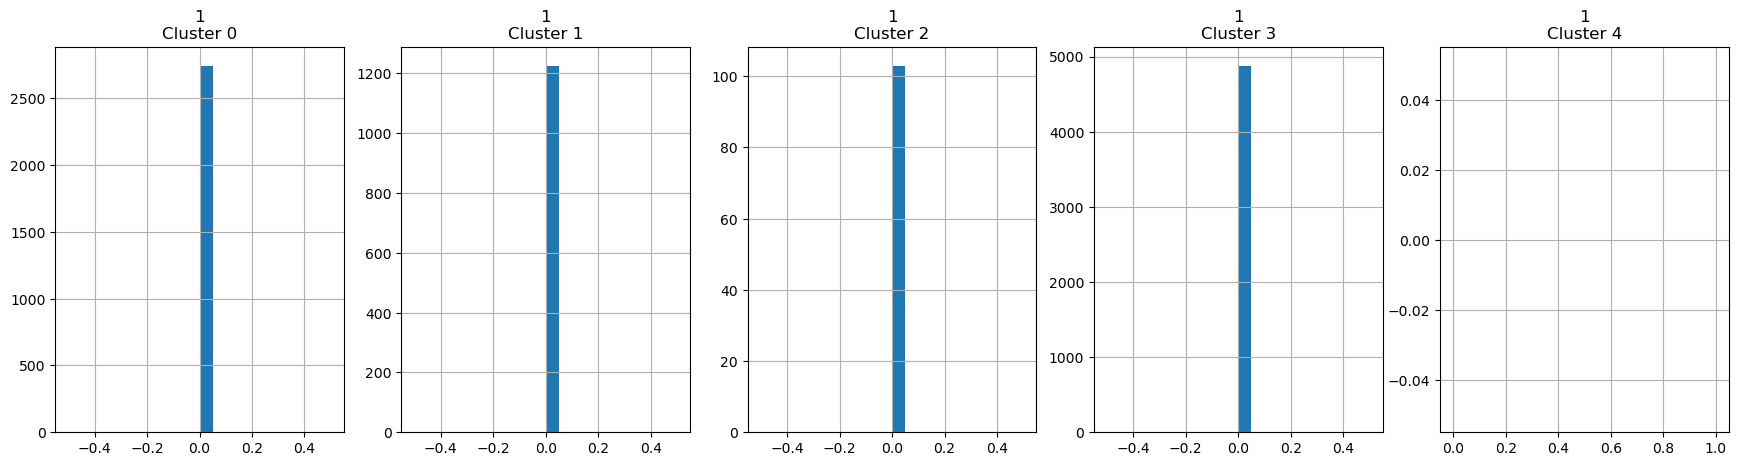

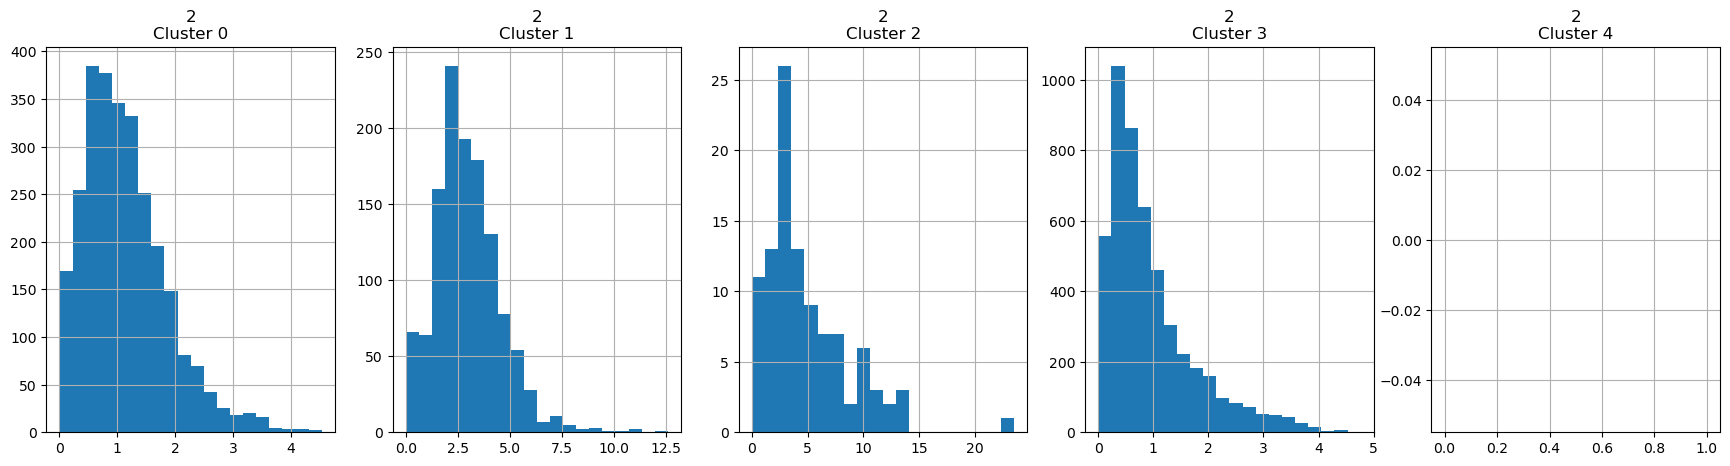

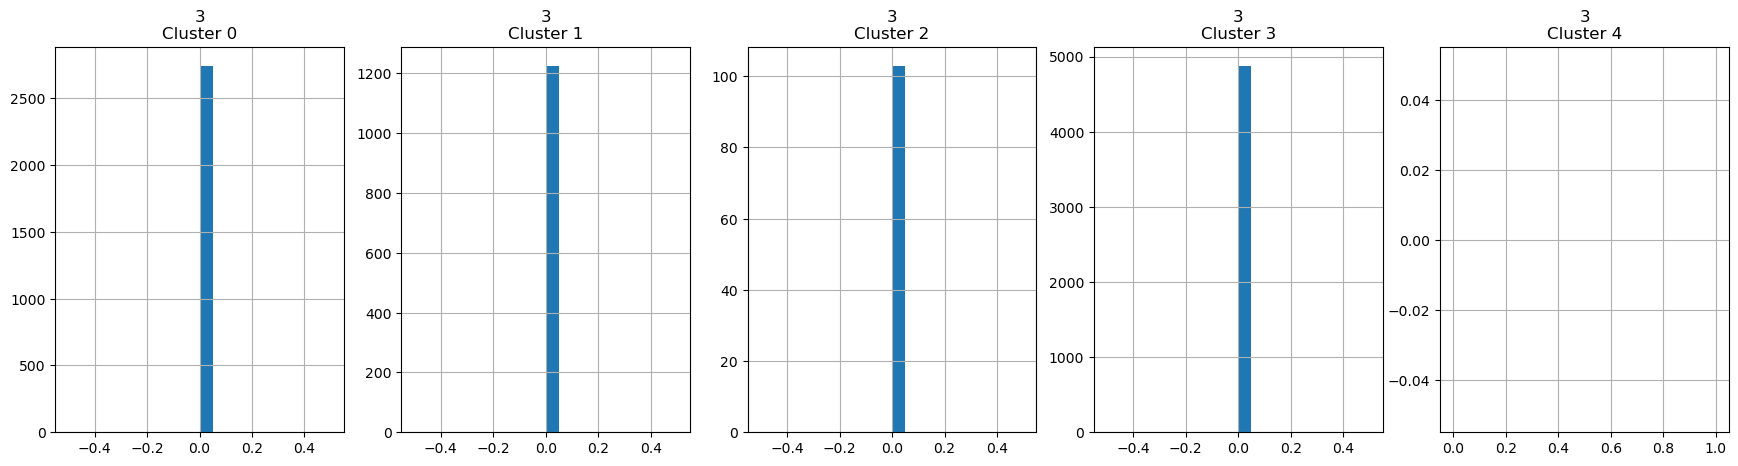

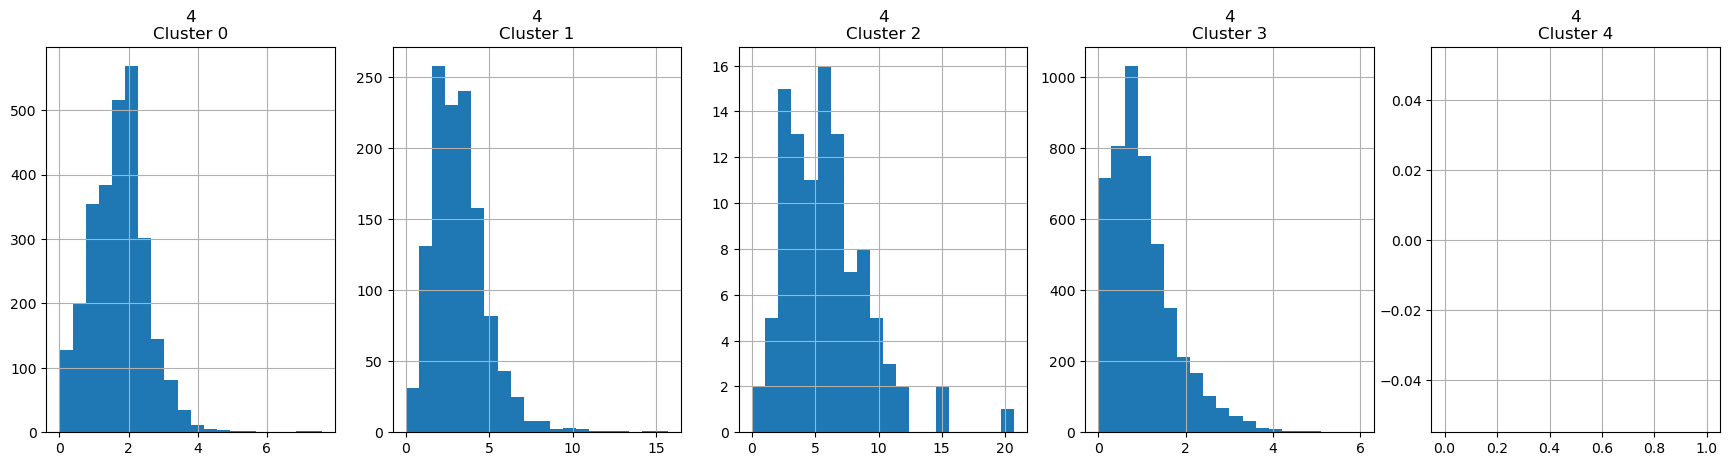

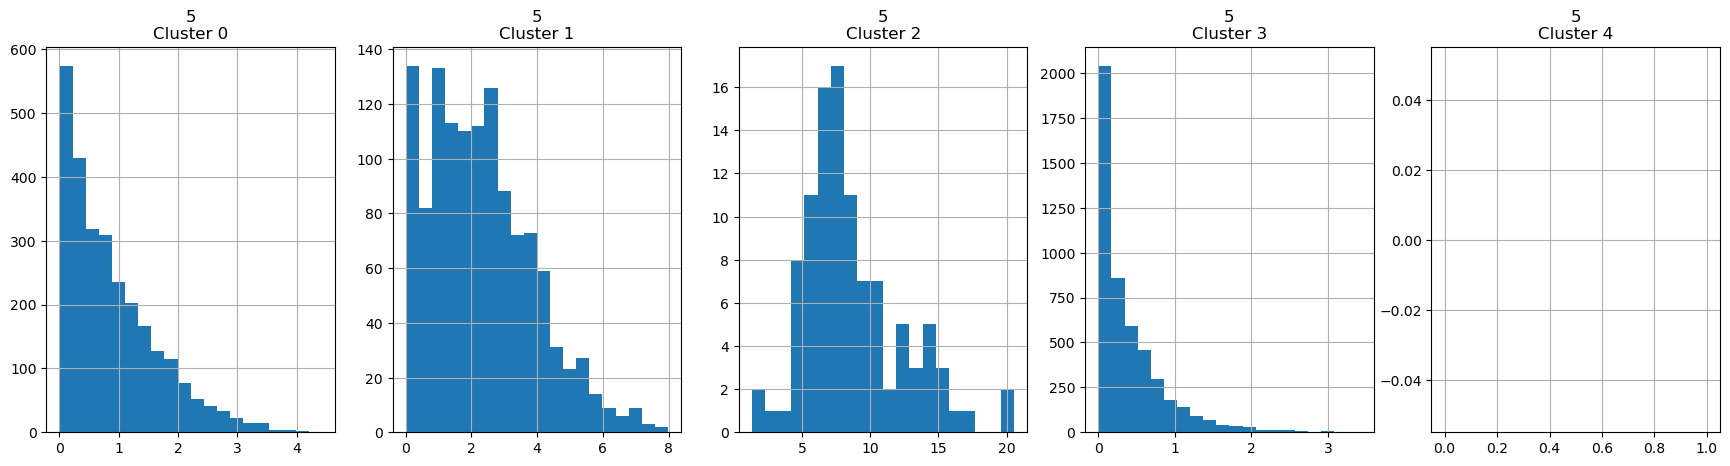

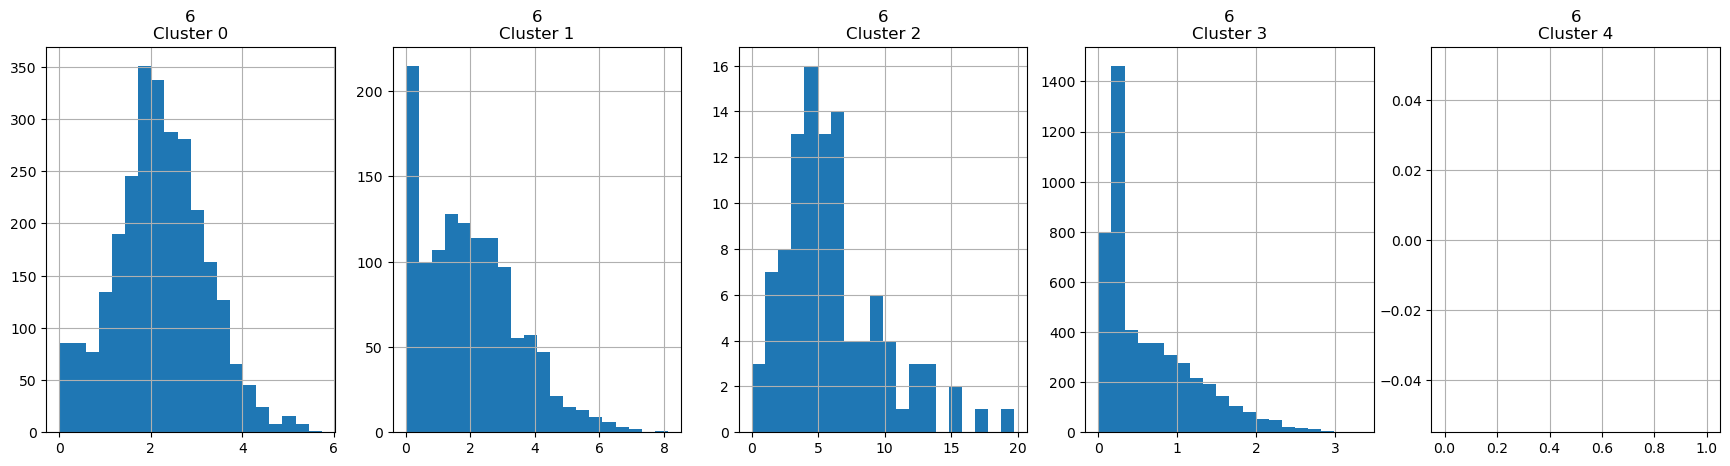

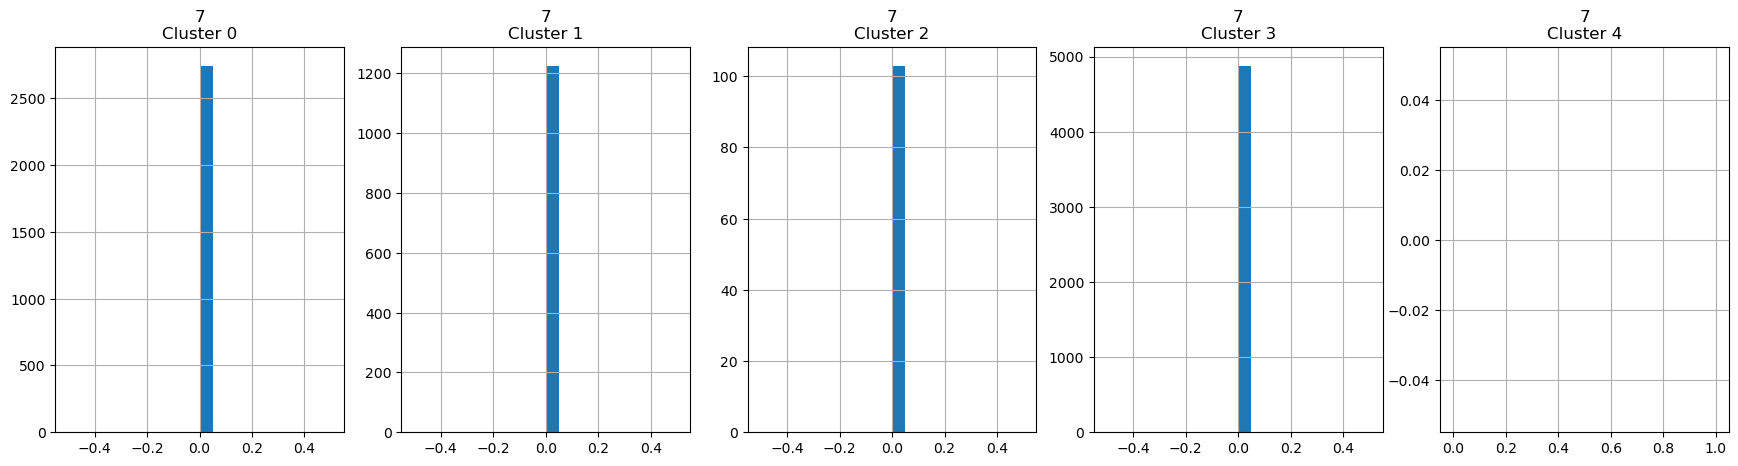

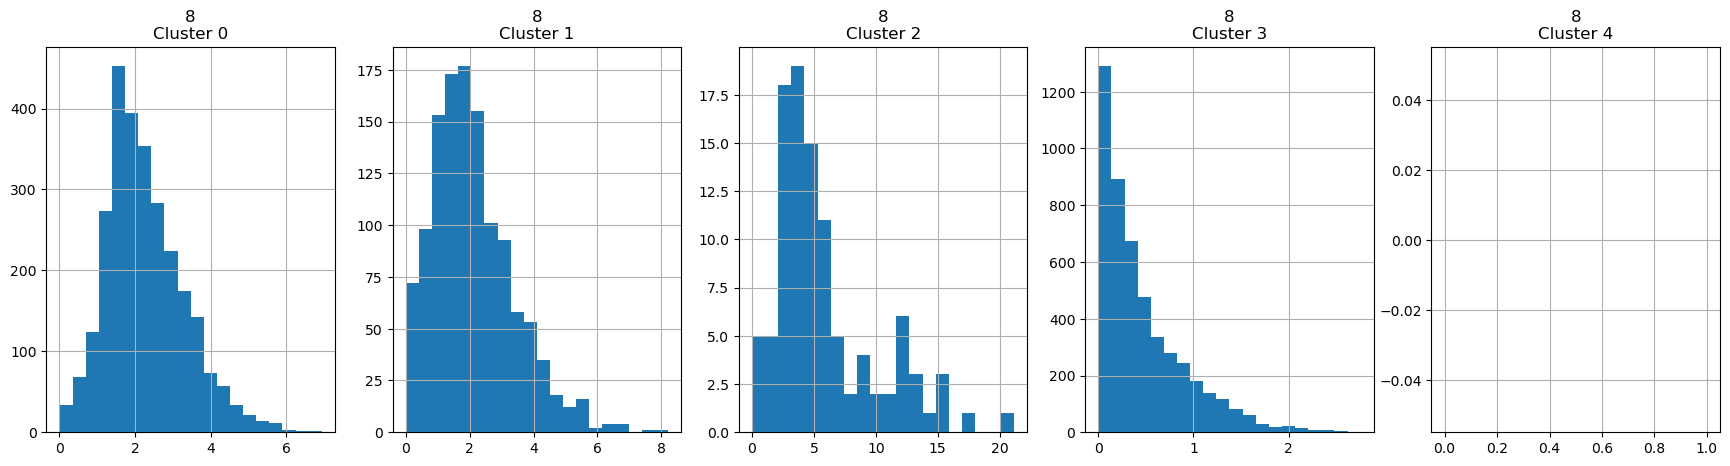

In [ ]:
for i in columns_pred:
    plt.figure(figsize = (35,5))
    for j in range(5):
        plt.subplot(1,8,j+1)
        cluster = pred_cluster[pred_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}\nCluster {}'.format(i,j))
        
plt.show()

# Applying PCA to new predicted features

In [156]:
pca_pred = PCA(n_components = 2)
principal_components_pred = pca.fit_transform(pred)
principal_components_pred

array([[-2.520637  , -0.07396185],
       [-0.17624372,  1.3053747 ],
       [-0.10855643, -0.9529689 ],
       ...,
       [ 1.2944736 ,  0.4121049 ],
       [ 1.3632424 ,  1.9517069 ],
       [ 3.0822628 ,  1.6701293 ]], dtype=float32)

In [157]:
pca_pred_df = pd.DataFrame(principal_components_pred, columns = ['pca1_pred', 'pca2_pred'])
pca_pred_df.head()

,pca1_pred,pca2_pred
0,-2.520637,-0.073962
1,-0.176244,1.305375
2,-0.108556,-0.952969
3,-0.025233,0.460196
4,-1.993588,-0.029675


In [158]:
pca_pred_df = pd.concat([pca_pred_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_pred_df.head()

,pca1_pred,pca2_pred,cluster
0,-2.520637,-0.073962,1
1,-0.176244,1.305375,1
2,-0.108556,-0.952969,1
3,-0.025233,0.460196,1
4,-1.993588,-0.029675,1


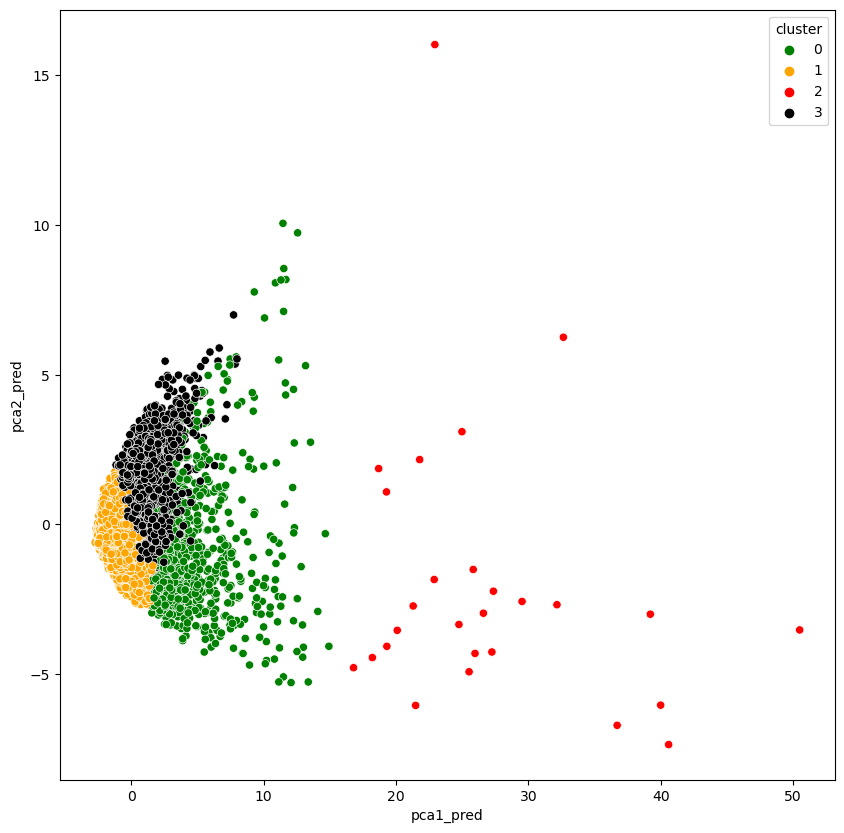

In [159]:
plt.figure(figsize = (10,10))
ax_pred = sns.scatterplot(x = 'pca1_pred', y = 'pca2_pred', hue = 'cluster', 
                      data = pca_pred_df, palette =['green', 'orange', 'red', 'black'])